# Setting

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats 
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Set

**Features**
* winner: VW returns on winners
* loser: VW returns on losers
* wml: winner - loser
* mvol: momentum volatility
* cum_winner: VW average of cumulative returns on winners
* cum_loser: VW average of cumulative returns on losers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_file = '/content/drive/MyDrive/UNIST/AICP/data/dynmom_dat.csv'

df = pd.read_csv(path_file)

In [ ]:
df.head(5)

,DATE,winner,loser,wml,mvol_cum6,mvol_t_1,mvol_t_2,mvol_t_3,mvol_t_4,mvol_t_5,mvol_t_6,form_date,cum_loser,cum_winner,cum_loser_t_2_4,cum_winner_t_2_4,cum_loser_t_5_8,cum_winner_t_5_8,cum_loser_t_9_12,cum_winner_t_9_12
0,19270228,0.070462,0.076982,-0.006520,0.000066,0.000066,NaN,NaN,NaN,NaN,NaN,19261231,-0.514437,0.664124,-0.075040,0.071111,0.035966,0.517440,-0.444397,0.044998
1,19270331,0.060910,-0.029905,0.090815,0.000077,0.000090,0.000066,NaN,NaN,NaN,NaN,19270131,-0.457240,0.810962,0.089708,0.146499,-0.172381,0.346365,-0.367260,0.190594
2,19270430,0.054892,0.013715,0.041178,0.000102,0.000145,0.000090,0.000066,NaN,NaN,NaN,19270228,-0.341429,1.169028,-0.040625,0.265445,-0.154044,0.170717,-0.147597,0.491362
3,19270531,0.062313,0.033305,0.029007,0.000125,0.000192,0.000145,0.000090,0.000066,NaN,NaN,19270331,-0.387173,1.125573,-0.186961,0.245070,-0.196204,0.171066,-0.038786,0.482203
4,19270630,-0.016884,-0.041274,0.024390,0.000112,0.000060,0.000192,0.000145,0.000090,0.000066,NaN,19270430,-0.361119,1.227225,-0.168839,0.280124,-0.143297,0.109987,-0.084307,0.613607


In [ ]:
df.tail(5)

,DATE,winner,loser,wml,mvol_cum6,mvol_t_1,mvol_t_2,mvol_t_3,mvol_t_4,mvol_t_5,mvol_t_6,form_date,cum_loser,cum_winner,cum_loser_t_2_4,cum_winner_t_2_4,cum_loser_t_5_8,cum_winner_t_5_8,cum_loser_t_9_12,cum_winner_t_9_12
1146,20220831,-0.009008,0.012847,-0.021856,0.001017,0.002066,0.001048,0.000951,0.000579,0.000893,0.000562,20220630,-0.829045,0.382083,-0.532794,-0.002381,-0.430525,0.282616,-0.241838,0.098331
1147,20220930,-0.054947,-0.154877,0.099930,0.001174,0.001515,0.002066,0.001048,0.000951,0.000579,0.000893,20220729,-0.827212,0.443827,-0.291523,0.069031,-0.521944,0.131525,-0.421729,0.212257
1148,20221031,0.145708,0.016386,0.129322,0.001121,0.000550,0.001515,0.002066,0.001048,0.000951,0.000579,20220831,-0.805134,0.473017,-0.194576,0.033273,-0.476449,0.219918,-0.487785,0.191280
1149,20221130,0.021950,-0.029342,0.051291,0.001171,0.000906,0.000550,0.001515,0.002066,0.001048,0.000951,20220930,-0.843123,0.281225,-0.202750,0.037969,-0.553215,0.079830,-0.504567,0.159115
1150,20221230,-0.038299,-0.148199,0.109899,0.001413,0.002415,0.000906,0.000550,0.001515,0.002066,0.001048,20221031,-0.823679,0.533725,-0.223016,0.128865,-0.513473,0.054722,-0.457145,0.296922


In [ ]:
df.shape

(1151, 20)

In [ ]:
df.columns

Index(['DATE', 'winner', 'loser', 'wml', 'mvol_cum6', 'mvol_t_1', 'mvol_t_2',
       'mvol_t_3', 'mvol_t_4', 'mvol_t_5', 'mvol_t_6', 'form_date',
       'cum_loser', 'cum_winner', 'cum_loser_t_2_4', 'cum_winner_t_2_4',
       'cum_loser_t_5_8', 'cum_winner_t_5_8', 'cum_loser_t_9_12',
       'cum_winner_t_9_12'],
      dtype='object')

In [ ]:
df.info()
y = df['wml']
X = df.drop(columns=['DATE', 'winner', 'loser', 'wml', 'from_date']) # Feature Selection 추후 수행, # 선형 모델 학습

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               1151 non-null   int64  
 1   winner             1151 non-null   float64
 2   loser              1151 non-null   float64
 3   wml                1151 non-null   float64
 4   mvol_cum6          1151 non-null   float64
 5   mvol_t_1           1151 non-null   float64
 6   mvol_t_2           1150 non-null   float64
 7   mvol_t_3           1149 non-null   float64
 8   mvol_t_4           1148 non-null   float64
 9   mvol_t_5           1147 non-null   float64
 10  mvol_t_6           1146 non-null   float64
 11  form_date          1151 non-null   int64  
 12  cum_loser          1151 non-null   float64
 13  cum_winner         1151 non-null   float64
 14  cum_loser_t_2_4    1151 non-null   float64
 15  cum_winner_t_2_4   1151 non-null   float64
 16  cum_loser_t_5_8    1151 

In [ ]:
df.isnull().sum()

DATE                 0
winner               0
loser                0
wml                  0
mvol_cum6            0
mvol_t_1             0
mvol_t_2             1
mvol_t_3             2
mvol_t_4             3
mvol_t_5             4
mvol_t_6             5
form_date            0
cum_loser            0
cum_winner           0
cum_loser_t_2_4      0
cum_winner_t_2_4     0
cum_loser_t_5_8      0
cum_winner_t_5_8     0
cum_loser_t_9_12     0
cum_winner_t_9_12    0
dtype: int64

# Preprocessing

## Drop Null

In [ ]:
drop_null_df = df.dropna()

In [ ]:
drop_null_df

,DATE,winner,loser,wml,mvol_cum6,mvol_t_1,mvol_t_2,mvol_t_3,mvol_t_4,mvol_t_5,mvol_t_6,form_date,cum_loser,cum_winner,cum_loser_t_2_4,cum_winner_t_2_4,cum_loser_t_5_8,cum_winner_t_5_8,cum_loser_t_9_12,cum_winner_t_9_12
5,19270730,0.132690,0.041090,0.091601,0.000105,0.000069,0.000060,0.000192,0.000145,0.000090,0.000066,19270531,-0.400762,1.107702,-0.214514,0.254698,-0.001376,0.278412,-0.215181,0.343708
6,19270831,0.054552,-0.006995,0.061547,0.000109,0.000093,0.000069,0.000060,0.000192,0.000145,0.000090,19270630,-0.439215,0.802865,-0.179042,0.156726,-0.116538,0.323911,-0.209301,0.187948
7,19270930,0.073537,-0.003878,0.077415,0.000114,0.000124,0.000093,0.000069,0.000060,0.000192,0.000145,19270730,-0.370776,0.894792,-0.092046,0.242991,-0.217916,0.300065,-0.087977,0.181972
8,19271031,-0.060986,-0.059982,-0.001004,0.000111,0.000126,0.000124,0.000093,0.000069,0.000060,0.000192,19270831,-0.397071,1.004889,-0.117316,0.210384,-0.160904,0.417261,-0.155103,0.192309
9,19271130,0.063794,0.136506,-0.072712,0.000103,0.000142,0.000126,0.000124,0.000093,0.000069,0.000060,19270930,-0.323037,1.091730,-0.025708,0.342157,-0.285988,0.213861,-0.010922,0.298614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,20220831,-0.009008,0.012847,-0.021856,0.001017,0.002066,0.001048,0.000951,0.000579,0.000893,0.000562,20220630,-0.829045,0.382083,-0.532794,-0.002381,-0.430525,0.282616,-0.241838,0.098331
1147,20220930,-0.054947,-0.154877,0.099930,0.001174,0.001515,0.002066,0.001048,0.000951,0.000579,0.000893,20220729,-0.827212,0.443827,-0.291523,0.069031,-0.521944,0.131525,-0.421729,0.212257
1148,20221031,0.145708,0.016386,0.129322,0.001121,0.000550,0.001515,0.002066,0.001048,0.000951,0.000579,20220831,-0.805134,0.473017,-0.194576,0.033273,-0.476449,0.219918,-0.487785,0.191280
1149,20221130,0.021950,-0.029342,0.051291,0.001171,0.000906,0.000550,0.001515,0.002066,0.001048,0.000951,20220930,-0.843123,0.281225,-0.202750,0.037969,-0.553215,0.079830,-0.504567,0.159115


In [ ]:
drop_null_df.drop(columns=['DATE', 'form_date']).describe()

,winner,loser,wml,mvol_cum6,mvol_t_1,mvol_t_2,mvol_t_3,mvol_t_4,mvol_t_5,mvol_t_6,cum_loser,cum_winner,cum_loser_t_2_4,cum_winner_t_2_4,cum_loser_t_5_8,cum_winner_t_5_8,cum_loser_t_9_12,cum_winner_t_9_12
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,0.015383,0.000613,0.014769,0.000252,0.000255,0.000253,0.000252,0.000252,0.000251,0.000249,-0.407701,1.026862,-0.126198,0.211408,-0.161490,0.292720,-0.167525,0.313520
std,0.067743,0.106289,0.086878,0.000469,0.000635,0.000631,0.000631,0.000631,0.000630,0.000628,0.230852,0.814111,0.180057,0.223115,0.172758,0.261958,0.152461,0.313658
min,-0.285116,-0.422556,-0.768369,0.000012,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,-0.906769,-0.272003,-0.760414,-0.220866,-0.686563,-0.244102,-0.756448,-0.300831
25%,-0.020873,-0.048400,-0.019321,0.000057,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,-0.578876,0.512249,-0.222932,0.099655,-0.262617,0.143517,-0.259989,0.148087
50%,0.018086,-0.000139,0.017435,0.000104,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,-0.421339,0.880472,-0.111133,0.189673,-0.146267,0.253574,-0.146703,0.254375
75%,0.057792,0.044870,0.058726,0.000220,0.000214,0.000214,0.000212,0.000211,0.000210,0.000210,-0.246377,1.264175,-0.030562,0.286159,-0.054271,0.384241,-0.067874,0.395429
max,0.346042,0.935821,0.330163,0.004883,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.288705,6.437708,1.729941,3.887279,1.288270,3.531319,0.450566,3.912327


In [ ]:
cond_wml = (drop_null_df['wml']>=0)
drop_null_df.loc[cond_wml, 'pos_wml'] = 1
drop_null_df.loc[~cond_wml, 'pos_wml'] = 0

In [ ]:
new_df = drop_null_df[['wml','pos_wml']]
new_df

,wml,pos_wml
5,0.091601,1.0
6,0.061547,1.0
7,0.077415,1.0
8,-0.001004,0.0
9,-0.072712,0.0
...,...,...
1146,-0.021856,0.0
1147,0.099930,1.0
1148,0.129322,1.0
1149,0.051291,1.0


In [ ]:
new_df['pos_wml'].value_counts()

1.0    733
0.0    413
Name: pos_wml, dtype: int64

## Set Index for Date

In [ ]:
dynmom = drop_null_df.copy()
dynmom['DATE'] = drop_null_df['DATE'].apply(lambda x : str(x))

In [ ]:
dynmom['year'] = dynmom['DATE'].str[:4]
dynmom['month'] = dynmom['DATE'].str[4:6]

In [ ]:
dynmom.index = dynmom['DATE']
dynmom = dynmom.drop(columns='DATE')

In [ ]:
dynmom['year'] = dynmom['year'].apply(lambda x : int(x))
dynmom['month'] = dynmom['month'].apply(lambda x : int(x))

## Generate Winner Minus Loser

In [ ]:
dynmom['cum_wml'] = dynmom['cum_winner'] - dynmom['cum_loser']
dynmom['cum_wml_t_2_4'] = dynmom['cum_winner_t_2_4'] - dynmom['cum_loser_t_2_4']
dynmom['cum_wml_5_8'] = dynmom['cum_winner_t_5_8'] - dynmom['cum_loser_t_5_8']
dynmom['cum_wml_9_12'] = dynmom['cum_winner_t_9_12'] - dynmom['cum_loser_t_9_12']

In [ ]:
dict_wml = {
            'winner':'wml',
            'cum_winner':'cum_wml',
            'cum_winner_t_2_4':'cum_wml_t_2_4',
            'cum_winner_t_5_8':'cum_wml_5_8',
            'cum_winner_t_9_12':'cum_wml_9_12'
            }

# Visualization

## Statistics

In [ ]:
def print_statistics(data, winner, loser, WML):

  # Winner
  max_W = data[winner].max()
  min_W = data[winner].min()
  mean_W = data[winner].mean()
  trim_1_W = stats.trim_mean(data[winner], 0.01)
  trim_5_W = stats.trim_mean(data[winner], 0.05)
  Q_25_W = data[winner].quantile(0.25)
  Q_75_W = data[winner].quantile(0.75)
  upper_W = Q_75_W + 1.5*(Q_75_W-Q_25_W)
  lower_W = Q_25_W - 1.5*(Q_75_W-Q_25_W)


  # Loser
  max_L = data[loser].max() 
  min_L = data[loser].min()
  mean_L = data[loser].mean()
  trim_1_L = stats.trim_mean(data[loser], 0.01)
  trim_5_L = stats.trim_mean(data[loser], 0.05)
  Q_25_L = data[loser].quantile(0.25)
  Q_75_L = data[loser].quantile(0.75)
  upper_L = Q_75_L + 1.5*(Q_75_L-Q_25_L)
  lower_L = Q_25_L - 1.5*(Q_75_L-Q_25_L)


  # WML
  max_M = data[WML].max()
  min_M = data[WML].min()
  mean_M = data[WML].mean()
  trim_1_M = stats.trim_mean(data[WML], 0.01)
  trim_5_M = stats.trim_mean(data[WML], 0.05)
  Q_25_M = data[WML].quantile(0.25)
  Q_75_M = data[WML].quantile(0.75)
  upper_M = Q_75_M + 1.5*(Q_75_M-Q_25_M)
  lower_M = Q_25_M - 1.5*(Q_75_M-Q_25_M)

  table = [[winner, max_W, min_W, mean_W, trim_1_W, trim_5_W, Q_25_W, Q_75_W, upper_W, lower_W],
           [loser, max_L, min_L, mean_L, trim_1_L, trim_5_L, Q_25_L, Q_75_L, upper_L, lower_L],
           [WML, max_M, min_M, mean_M, trim_1_M, trim_5_M, Q_25_M, Q_75_M, upper_M, lower_M]]
  
  print()
  print(tabulate(table, headers=["W/L/WML", "MAX", "MIN", "MEAN",
                                 "trimmed_1%", "trimmed_5%",
                                 "Q 1", "Q 3", "UPPER", "LOWER"]))
  print()

## Winner VS Loser

In [ ]:
def winner_vs_loser(x, winner, loser, data, ylabel, title, wml=False):
  plt.figure(figsize=(13, 6))
  sns.lineplot(x=x,
              y=winner,
              data=data,
              label=winner,
              alpha=0.3)

  sns.lineplot(x=x,
              y=loser,
              data=data,
              label=loser,
              alpha=0.3)
  
  if wml == True:
    WML = dict_wml[winner]
    sns.lineplot(x=x,
                 y=WML,
                 data=data,
                 label=WML,
                 color='r',
                 alpha=1)

  plt.xticks([dynmom.index[i] for i in range(0,len(dynmom.index), 12)])

  plt.tick_params(axis='x',
                  direction='out',
                  labelrotation=45,
                  length=1,
                  pad=10,
                  labelsize=3,
                  width=0.1)


  plt.title(title + ' Line Plot')
  plt.xlabel('DATE')
  plt.ylabel(ylabel)

  plt.legend(fontsize=10)

  plt.show()

  print_statistics(data=data,
                   winner=winner,
                   loser=loser,
                   WML=WML)

  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

  sns.scatterplot(x=loser,
                  y=winner,
                  data=data,
                  s=5,
                  color='g',
                  ax=ax[0, 0])
  
  ax[0, 0].set_xticks(list(np.arange(-0.8, 2.2, 0.2)))
  ax[0, 0].set_yticks(list(np.arange(0, 9, 1)))

  ax[0, 0].set_title(title+ ' Scatter')
  ax[0, 0].set_xlabel(loser)
  ax[0, 0].set_ylabel(winner)

  sns.histplot(data=dynmom, x=winner, label=winner, ax=ax[0, 1])
  sns.histplot(data=dynmom, x=loser, label=loser, color='orange', ax=ax[0, 1])
  ax[0, 1].set_title(f'{winner} & {loser} Histogram')

  sns.boxplot(data=dynmom, y=winner, ax=ax[1, 0])
  ax[1, 0].set_title(f'{winner} Box Plot')
  ax[1, 0].set_yticks(list(np.arange(min(min(data[winner]), min(data[loser])),
                                     max(max(data[winner]), max(data[loser])),
                                     1)))

  sns.boxplot(data=dynmom, y=loser, color='orange',ax=ax[1, 1])
  ax[1, 1].set_title(f'{loser} Box Plot')
  ax[1, 1].set_yticks(list(np.arange(min(min(data[winner]), min(data[loser])),
                                    max(max(data[winner]), max(data[loser])),
                                    1)))

  plt.show()

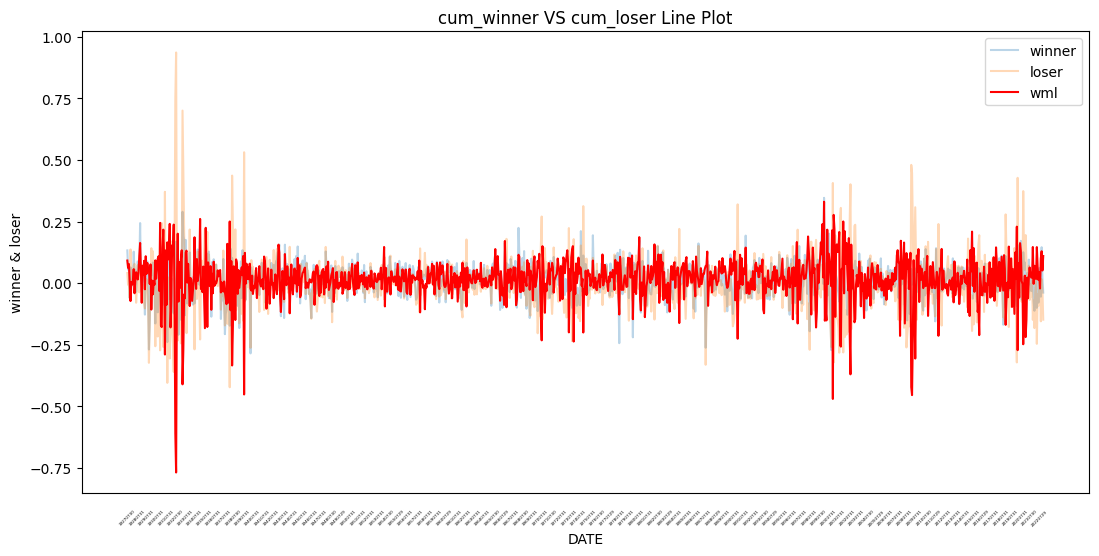


W/L/WML         MAX        MIN         MEAN    trimmed_1%    trimmed_5%         Q 1        Q 3     UPPER      LOWER
---------  --------  ---------  -----------  ------------  ------------  ----------  ---------  --------  ---------
winner     0.346042  -0.285116  0.0153826      0.0157427     0.0166774   -0.0208727  0.0577921  0.175789  -0.13887
loser      0.935821  -0.422556  0.000613366   -0.00145936   -0.00224864  -0.0483996  0.0448705  0.184776  -0.188305
wml        0.330163  -0.768369  0.0147692      0.0169298     0.0190409   -0.0193214  0.0587255  0.175796  -0.136392



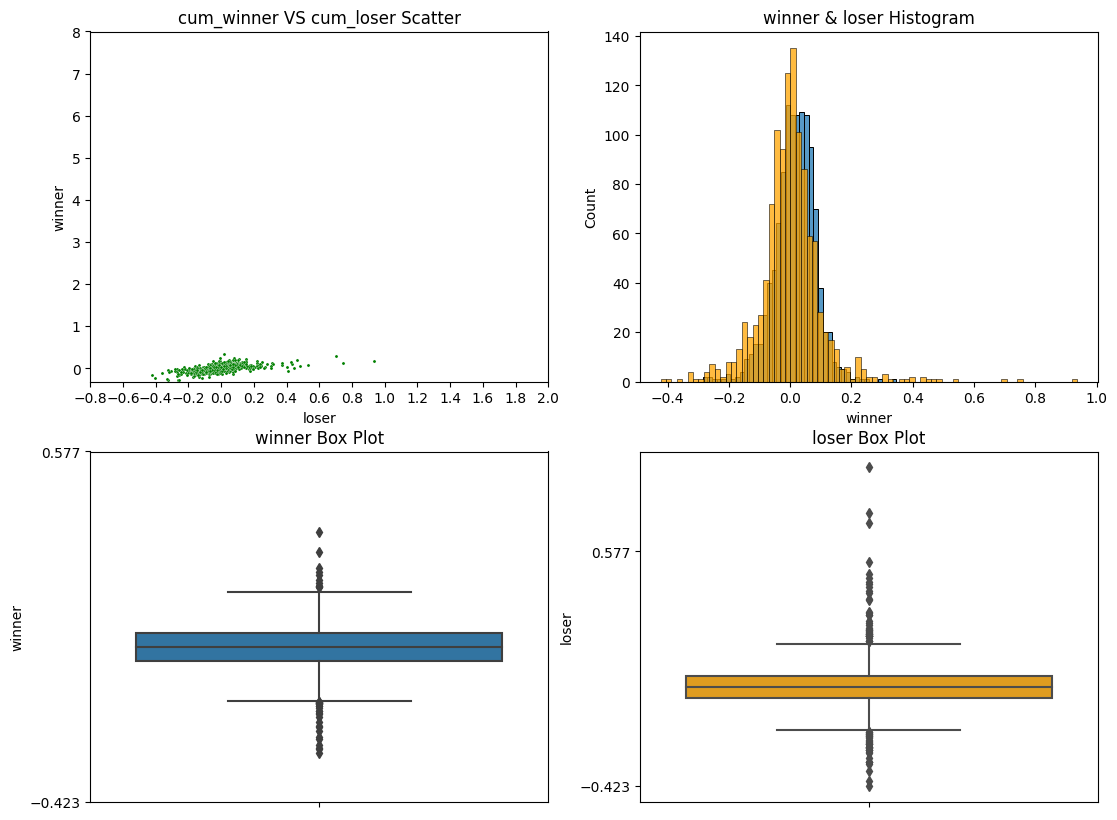

In [ ]:
winner_vs_loser(x=dynmom.index,
                winner='winner',
                loser='loser',
                data=dynmom,
                ylabel='winner & loser',
                title='cum_winner VS cum_loser',
                wml=True)

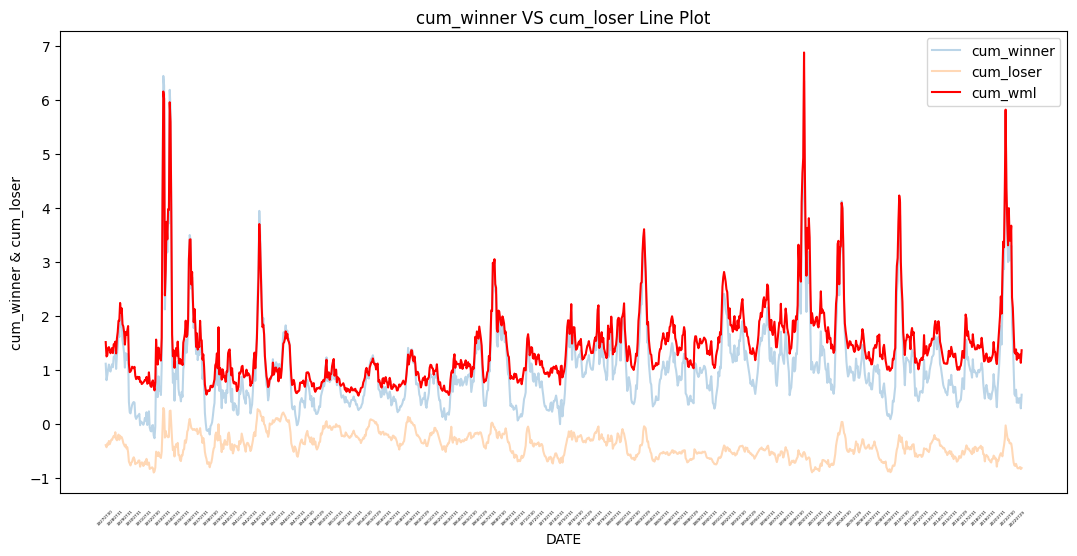


W/L/WML          MAX        MIN       MEAN    trimmed_1%    trimmed_5%        Q 1        Q 3     UPPER       LOWER
----------  --------  ---------  ---------  ------------  ------------  ---------  ---------  --------  ----------
cum_winner  6.43771   -0.272003   1.02686       0.996989      0.936506   0.512249   1.26418   2.39207   -0.615641
cum_loser   0.288705  -0.906769  -0.407701     -0.409274     -0.412767  -0.578876  -0.246377  0.252372  -1.07763
cum_wml     6.8719     0.517162   1.43456       1.40436       1.34575    0.963294   1.66469   2.71678   -0.0887996



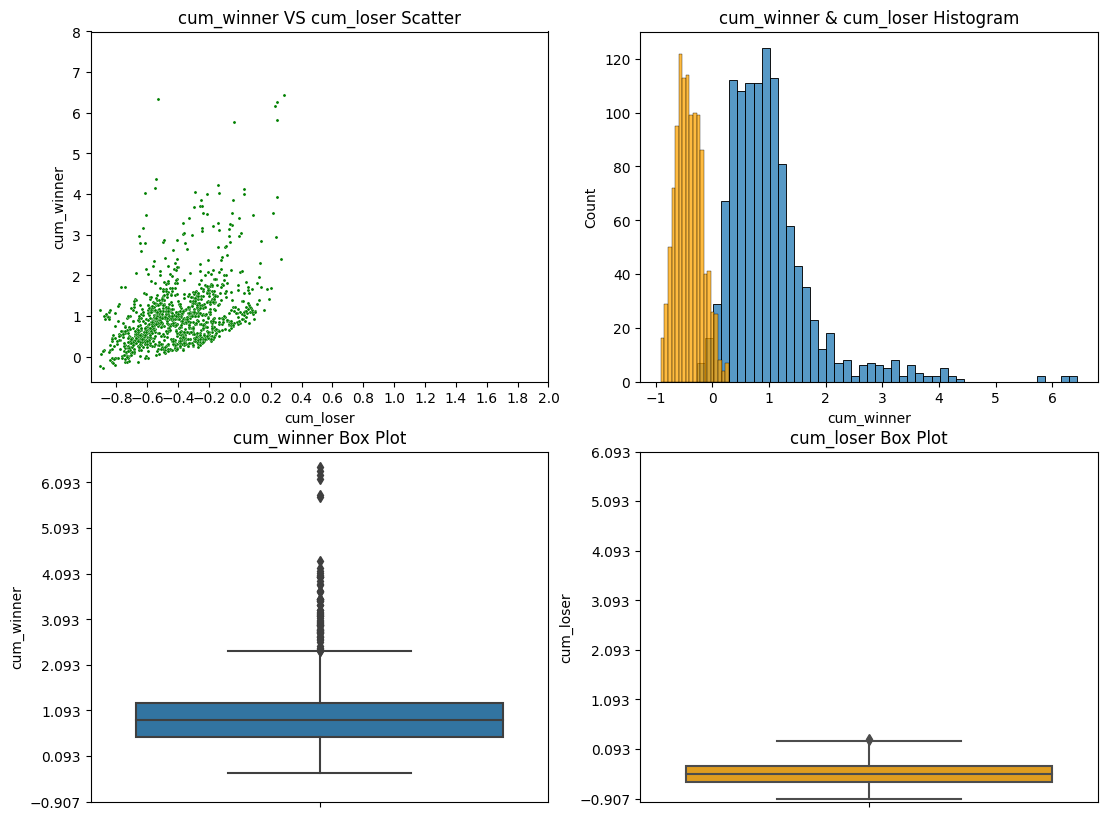

In [ ]:
winner_vs_loser(x=dynmom.index,
                winner='cum_winner',
                loser='cum_loser',
                data=dynmom,
                ylabel='cum_winner & cum_loser',
                title='cum_winner VS cum_loser',
                wml=True
                )

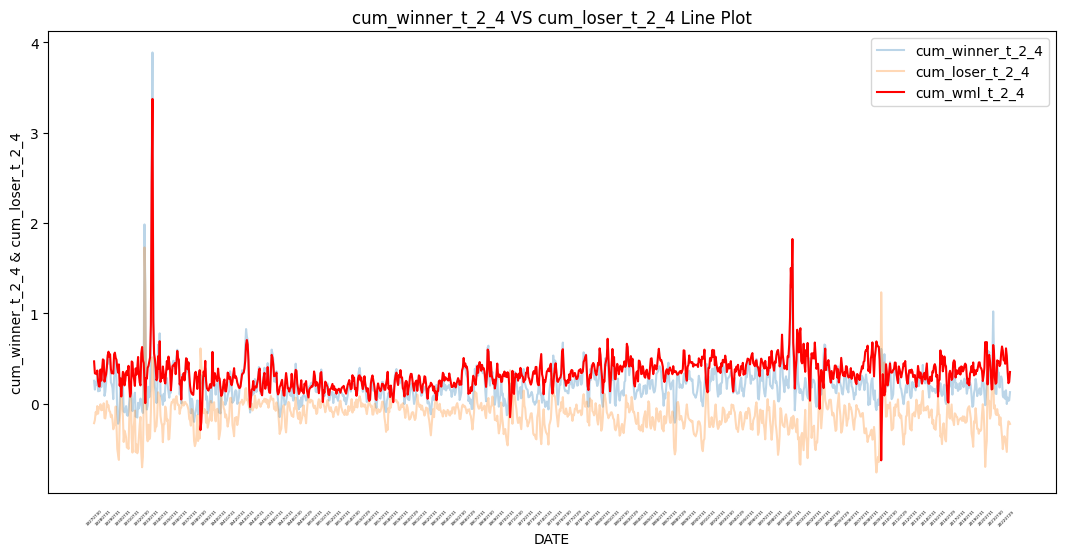


W/L/WML               MAX        MIN       MEAN    trimmed_1%    trimmed_5%         Q 1         Q 3     UPPER       LOWER
----------------  -------  ---------  ---------  ------------  ------------  ----------  ----------  --------  ----------
cum_winner_t_2_4  3.88728  -0.220866   0.211408      0.20139       0.196816   0.0996545   0.286159   0.565916  -0.180103
cum_loser_t_2_4   1.72994  -0.760414  -0.126198     -0.129379     -0.126889  -0.222932   -0.0305625  0.257991  -0.511485
cum_wml_t_2_4     3.37358  -0.625942   0.337606      0.331617      0.329163   0.232696    0.418575   0.697394  -0.0461226



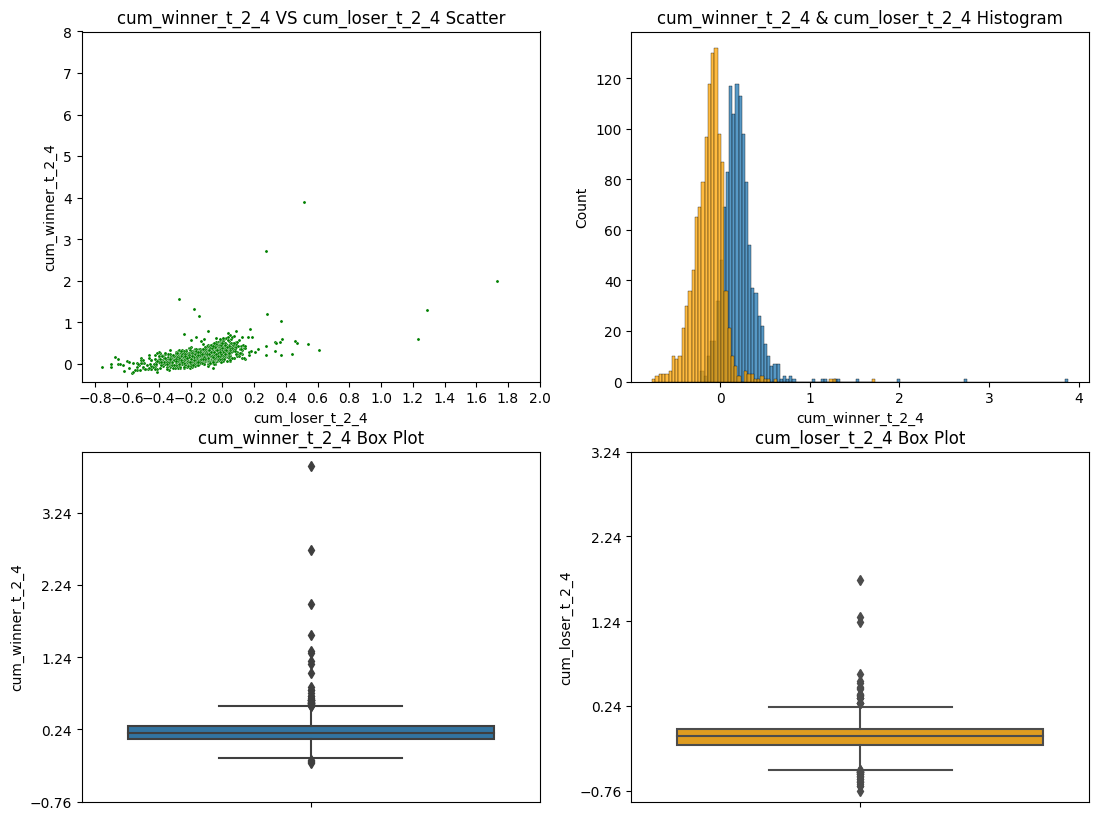

In [ ]:
winner_vs_loser(x=dynmom.index,
                winner='cum_winner_t_2_4',
                loser='cum_loser_t_2_4',
                data=dynmom,
                ylabel='cum_winner_t_2_4 & cum_loser_t_2_4',
                title='cum_winner_t_2_4 VS cum_loser_t_2_4',
                wml=True)

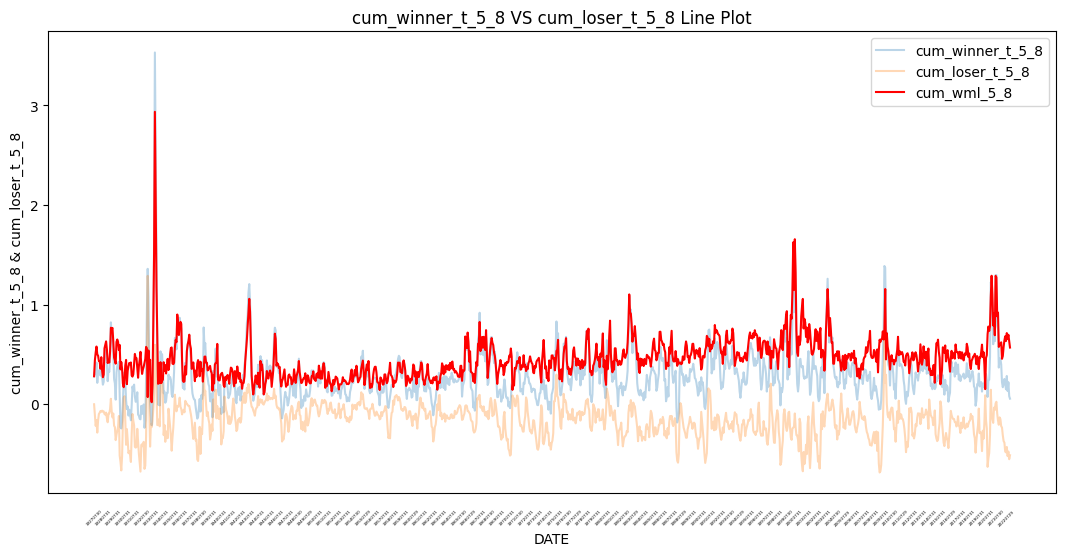


W/L/WML               MAX        MIN      MEAN    trimmed_1%    trimmed_5%        Q 1         Q 3     UPPER       LOWER
----------------  -------  ---------  --------  ------------  ------------  ---------  ----------  --------  ----------
cum_winner_t_5_8  3.53132  -0.244102   0.29272      0.283703      0.272755   0.143517   0.384241   0.745327  -0.217569
cum_loser_t_5_8   1.28827  -0.686563  -0.16149     -0.163101     -0.159302  -0.262617  -0.0542707  0.258248  -0.575136
cum_wml_5_8       2.93558   0.019141   0.45421      0.446694      0.438382   0.318166   0.543249   0.880874  -0.0194583



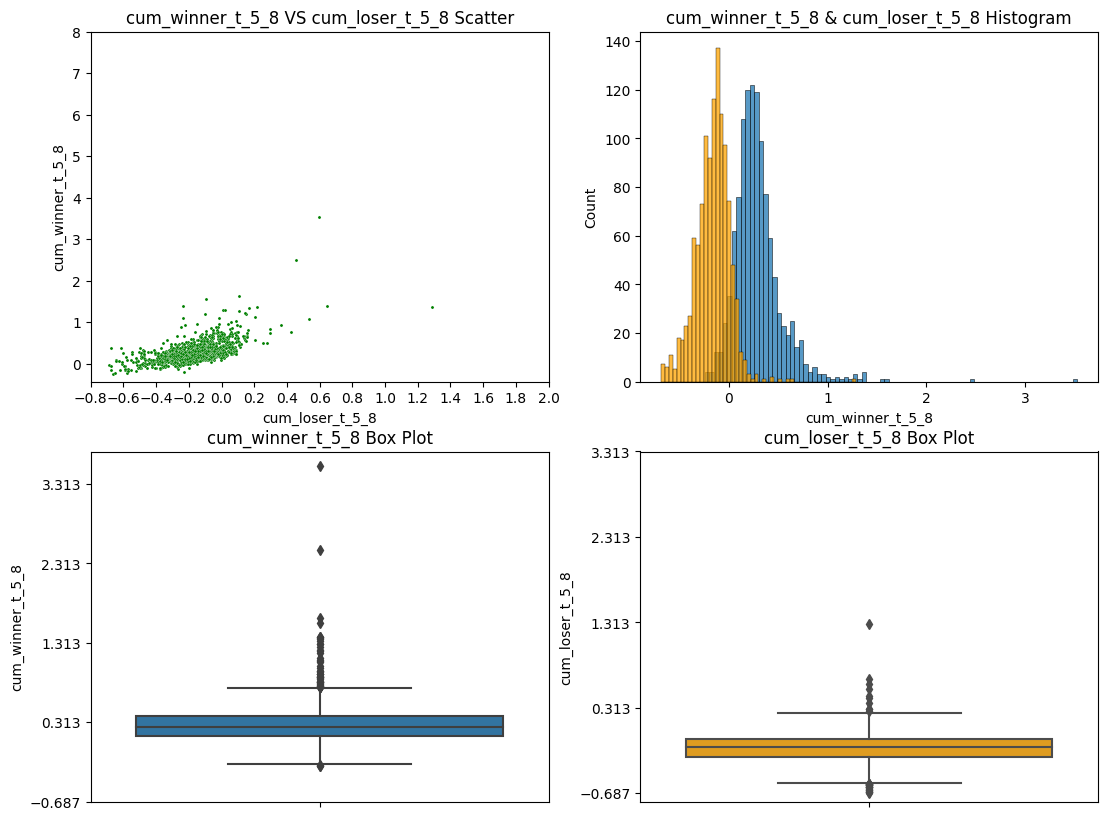

In [ ]:
winner_vs_loser(x=dynmom.index,
                winner='cum_winner_t_5_8',
                loser='cum_loser_t_5_8',
                data=dynmom,
                ylabel='cum_winner_t_5_8 & cum_loser_t_5_8',
                title='cum_winner_t_5_8 VS cum_loser_t_5_8',
                wml=True)

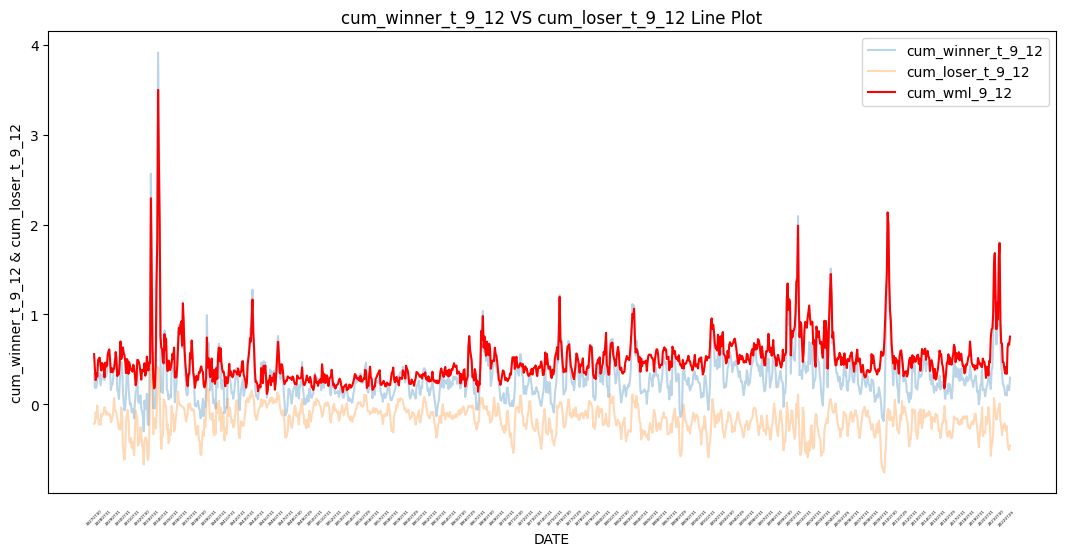


W/L/WML                 MAX        MIN       MEAN    trimmed_1%    trimmed_5%        Q 1         Q 3     UPPER        LOWER
-----------------  --------  ---------  ---------  ------------  ------------  ---------  ----------  --------  -----------
cum_winner_t_9_12  3.91233   -0.300831   0.31352       0.299126      0.281474   0.148087   0.395429   0.766442  -0.222926
cum_loser_t_9_12   0.450566  -0.756448  -0.167525     -0.167038     -0.162634  -0.259989  -0.0678737  0.220298  -0.548161
cum_wml_9_12       3.49639    0.11629    0.481045      0.468035      0.4512     0.328997   0.552505   0.887766  -0.00626462



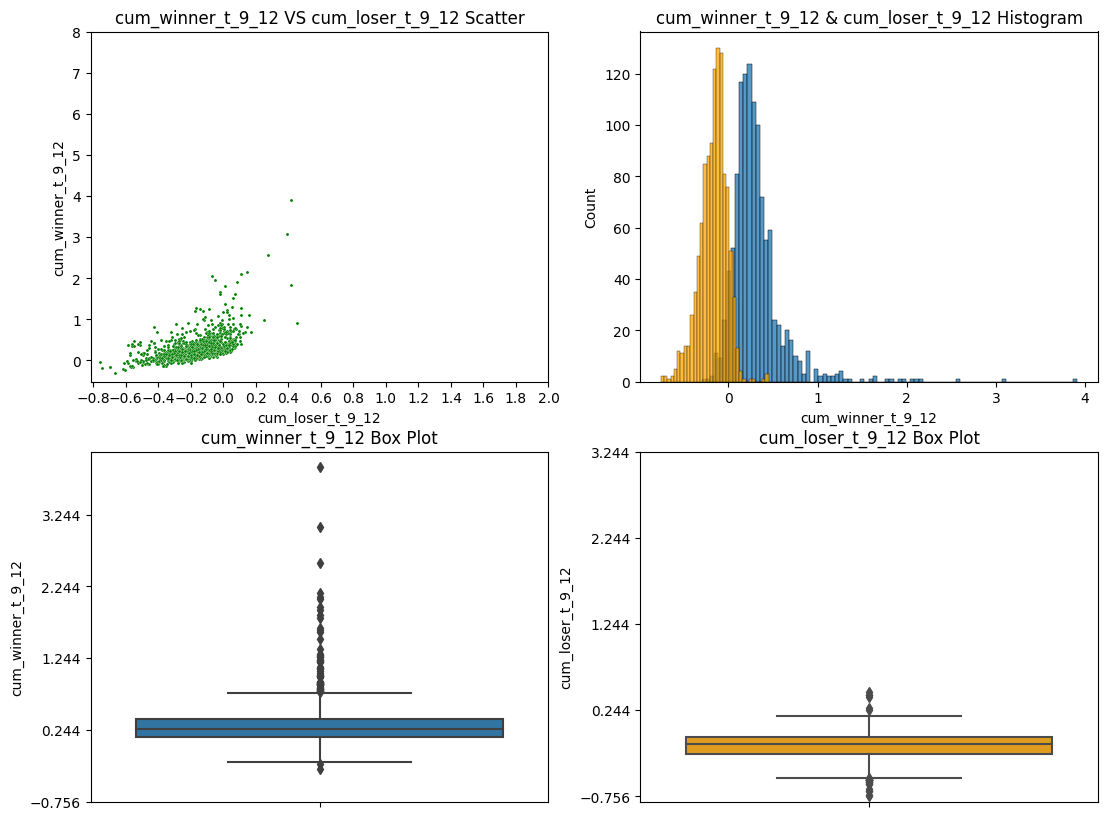

In [ ]:
winner_vs_loser(x=dynmom.index,
                winner='cum_winner_t_9_12',
                loser='cum_loser_t_9_12',
                data=dynmom,
                ylabel='cum_winner_t_9_12 & cum_loser_t_9_12',
                title='cum_winner_t_9_12 VS cum_loser_t_9_12',
                wml=True)

## Compare Volatility of Momentum

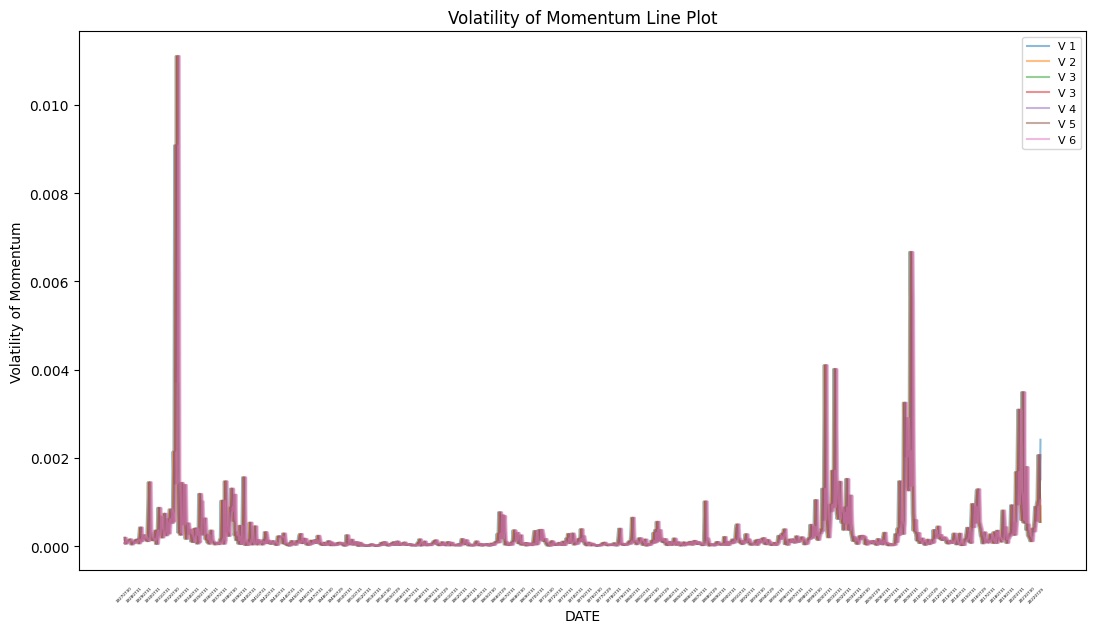

In [ ]:
plt.figure(figsize=(13, 7))

sns.lineplot(x=dynmom.index,
             y='mvol_t_1',
             label='V 1',
             data=dynmom,
             alpha=0.5)

sns.lineplot(x=dynmom.index,
             y='mvol_t_2',
             label='V 2',
             data=dynmom,
             alpha=0.5)

sns.lineplot(x=dynmom.index,
             y='mvol_t_3',
             label='V 3',
             data=dynmom,
             alpha=0.5)

sns.lineplot(x=dynmom.index,
             y='mvol_t_3',
             label='V 3',
             data=dynmom,
             alpha=0.5)

sns.lineplot(x=dynmom.index,
             y='mvol_t_4',
             label='V 4',
             data=dynmom,
             alpha=0.5)

sns.lineplot(x=dynmom.index,
             y='mvol_t_5',
             label='V 5',
             data=dynmom,
             alpha=0.5)

sns.lineplot(x=dynmom.index,
             y='mvol_t_6',
             label='V 6',
             data=dynmom,
             alpha=0.5)

plt.xticks([dynmom.index[i] for i in range(0,len(dynmom.index), 12)])

plt.tick_params(axis='x',
                  direction='out',
                  labelrotation=45,
                  length=1,
                  pad=10,
                  labelsize=3,
                  width=0.1)

plt.title('Volatility of Momentum' + ' Line Plot')
plt.xlabel('DATE')
plt.ylabel('Volatility of Momentum')

plt.legend(fontsize=8)

plt.show()

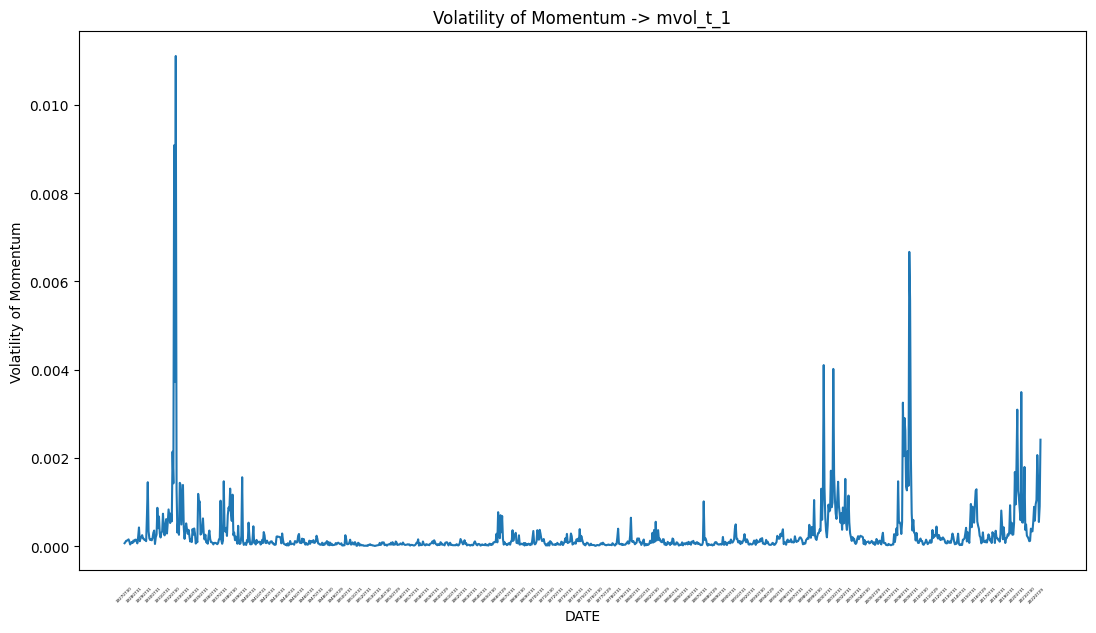

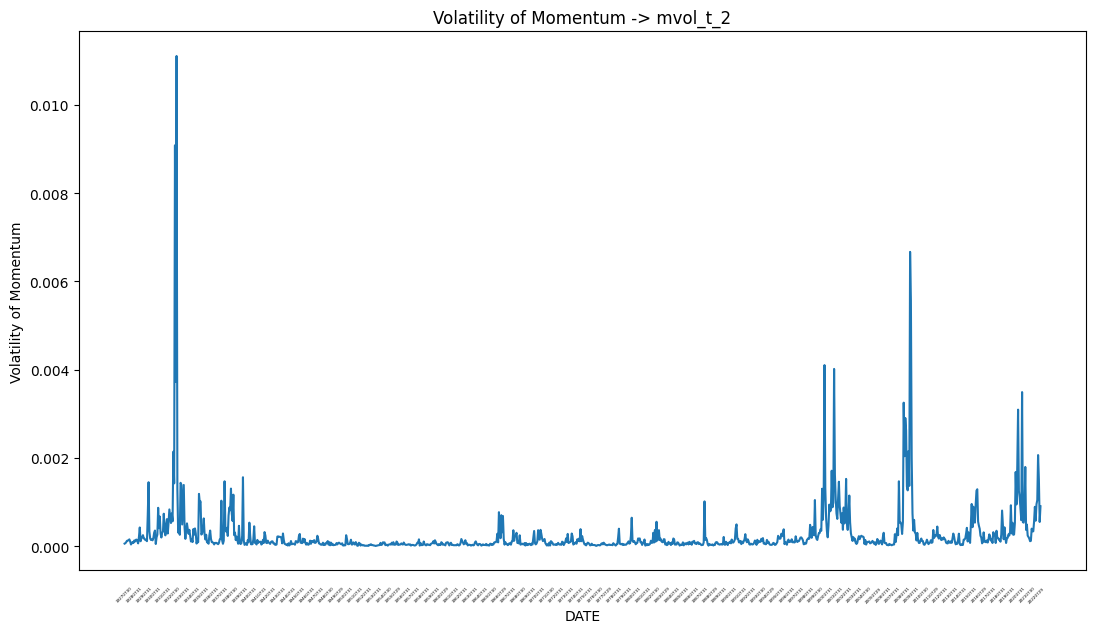

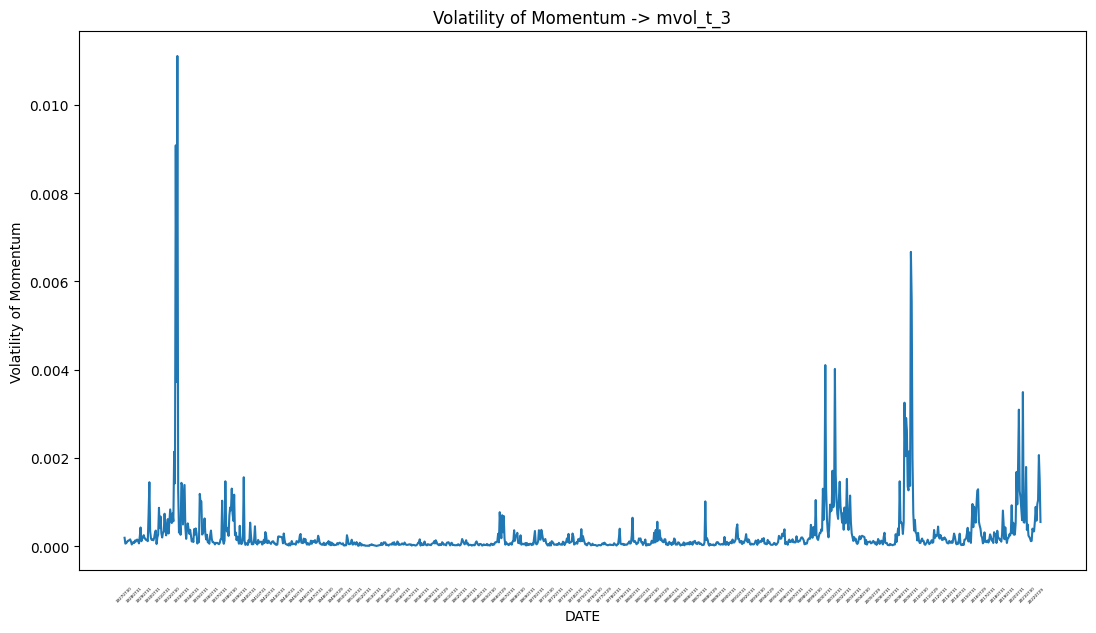

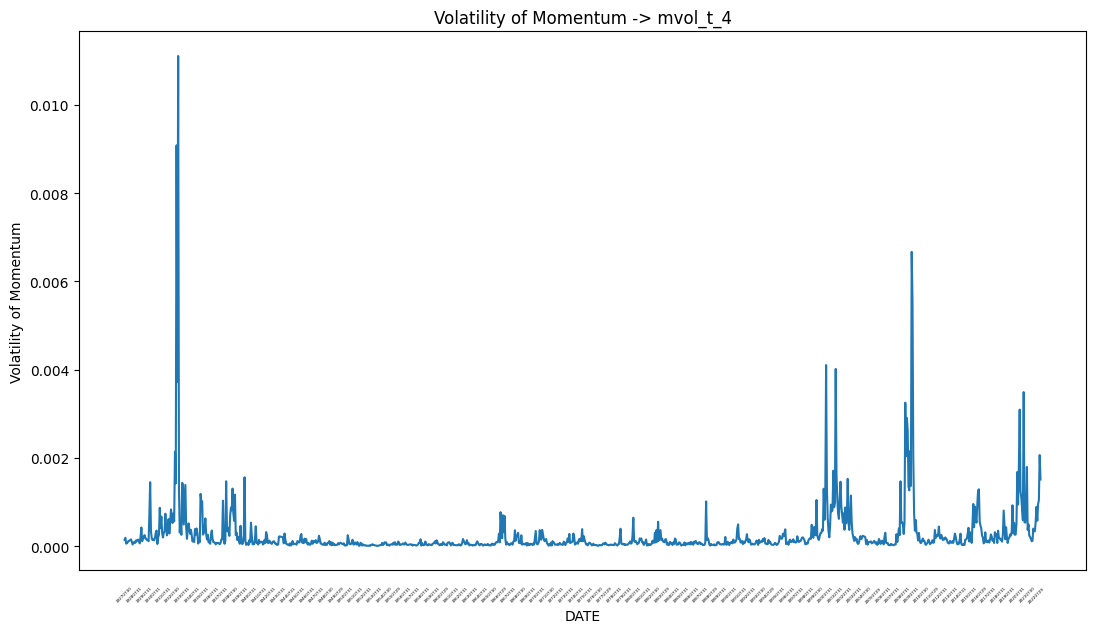

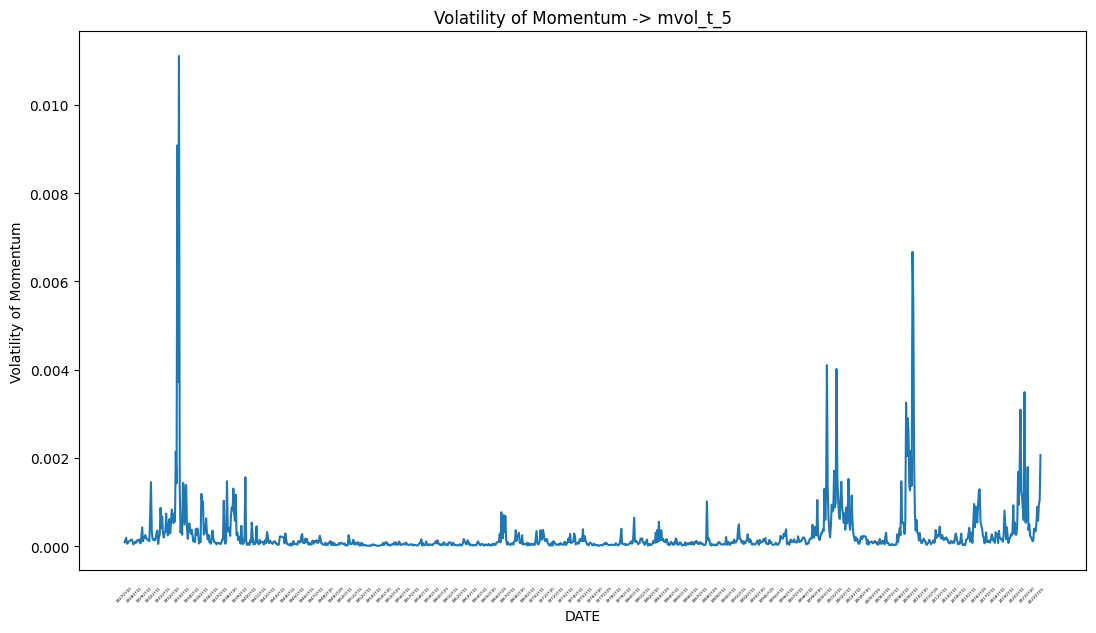

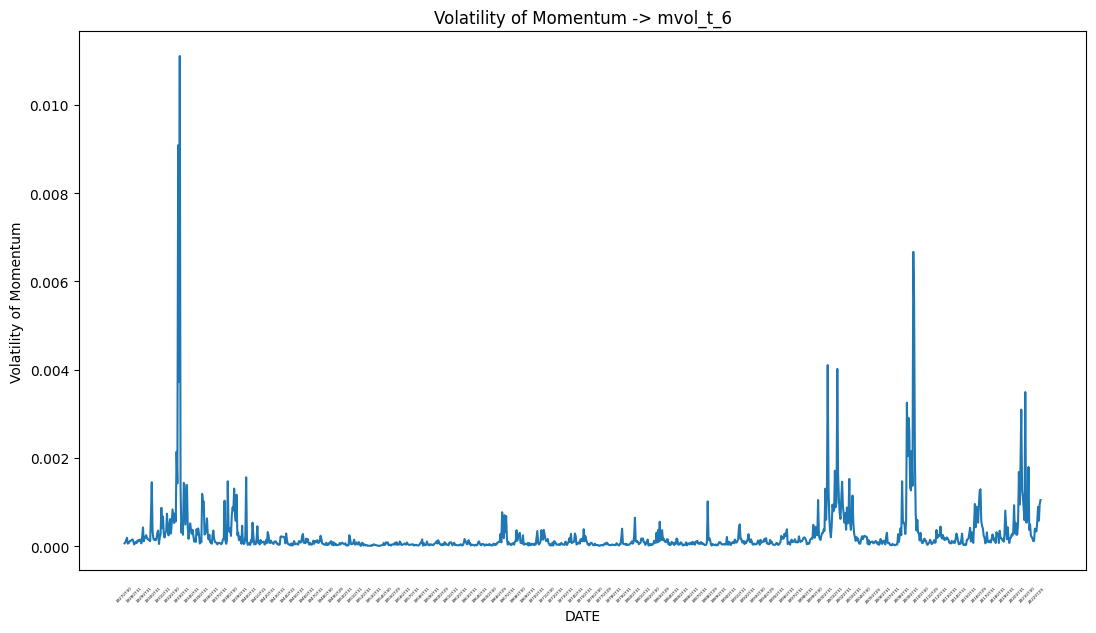

In [ ]:
for t in [i for i in dynmom.columns if 'mvol_t_' in i]:
  
  plt.figure(figsize=(13, 7))

  sns.lineplot(x=dynmom.index,
               y=t,
               data=dynmom)
  
  plt.xticks([dynmom.index[i] for i in range(0,len(dynmom.index), 12)])

  plt.tick_params(axis='x',
                  direction='out',
                  labelrotation=45,
                  length=1,
                  pad=10,
                  labelsize=3,
                  width=0.1)

  plt.title('Volatility of Momentum -> ' + f'{t}')
  plt.xlabel('DATE')
  plt.ylabel('Volatility of Momentum')

  plt.show()

In [ ]:
def who_Volatility(data, mvol):

  fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 33))

  ax[0,0] = sns.scatterplot(x=mvol,
                            y='mvol_cum6',
                            data=data,
                            s=5,
                            color='g',
                            ax=ax[0, 0])
  ax[0, 0].set_title(mvol+ ' mvol_cum6')

  ax[0,1] = sns.scatterplot(x=mvol,
                            y='winner',
                            data=data,
                            s=5,
                            color='g',
                            ax=ax[0, 1])
  ax[0, 1].set_title(mvol+ ' winner')
  
  ax[1,0] = sns.scatterplot(x=mvol,
                            y='loser',
                            data=data,
                            s=5,
                            color='g',
                            ax=ax[1, 0])
  ax[1, 0].set_title(mvol+ ' loser')
  
  ax[1,1] = sns.scatterplot(x=mvol,
                          y='wml',
                          data=data,
                          s=5,
                          color='g',
                          ax=ax[1, 1])
  ax[1, 1].set_title(mvol+ ' wml')
  
  ax[2, 0] = sns.scatterplot(x=mvol,
                        y='cum_loser',
                        data=data,
                        s=5,
                        color='g',
                        ax=ax[2, 0])
  ax[2, 0].set_title(mvol+ ' cum_loser')
  
  ax[2, 1] = sns.scatterplot(x=mvol,
                      y='cum_winner',
                      data=data,
                      s=5,
                      color='g',
                      ax=ax[2, 1])
  ax[2, 1].set_title(mvol+ ' cum_winner')
  
  ax[3,0] = sns.scatterplot(x=mvol,
                      y='cum_loser_t_2_4',
                      data=data,
                      s=5,
                      color='g',
                      ax=ax[3, 0])
  ax[3, 0].set_title(mvol+ ' cum_loser_t_2_4')

  ax[3,1] = sns.scatterplot(x=mvol,
                      y='cum_winner_t_2_4',
                      data=data,
                      s=5,
                      color='g',
                      ax=ax[3, 1])
  ax[3, 1].set_title(mvol+ ' cum_winner_t_2_4')

  ax[4,0] = sns.scatterplot(x=mvol,
                      y='cum_loser_t_5_8',
                      data=data,
                      s=5,
                      color='g',
                      ax=ax[4, 0])
  ax[4, 0].set_title(mvol+ ' cum_loser_t_5_8')

  ax[4,1] = sns.scatterplot(x=mvol,
                      y='cum_winner_t_5_8',
                      data=data,
                      s=5,
                      color='g',
                      ax=ax[4, 1])
  ax[4, 1].set_title(mvol+ ' cum_winner_t_5_8')

  ax[5,0] = sns.scatterplot(x=mvol,
                      y='cum_loser_t_9_12',
                      data=data,
                      s=5,
                      color='g',
                      ax=ax[5, 0])
  ax[5, 0].set_title(mvol+ ' cum_loser_t_9_12')

  ax[5,1] = sns.scatterplot(x=mvol,
                      y='cum_winner_t_9_12',
                      data=data,
                      s=5,
                      color='g',
                      ax=ax[5, 1])
  ax[5, 1].set_title(mvol+ ' cum_winner_t_9_12')
  plt.show()

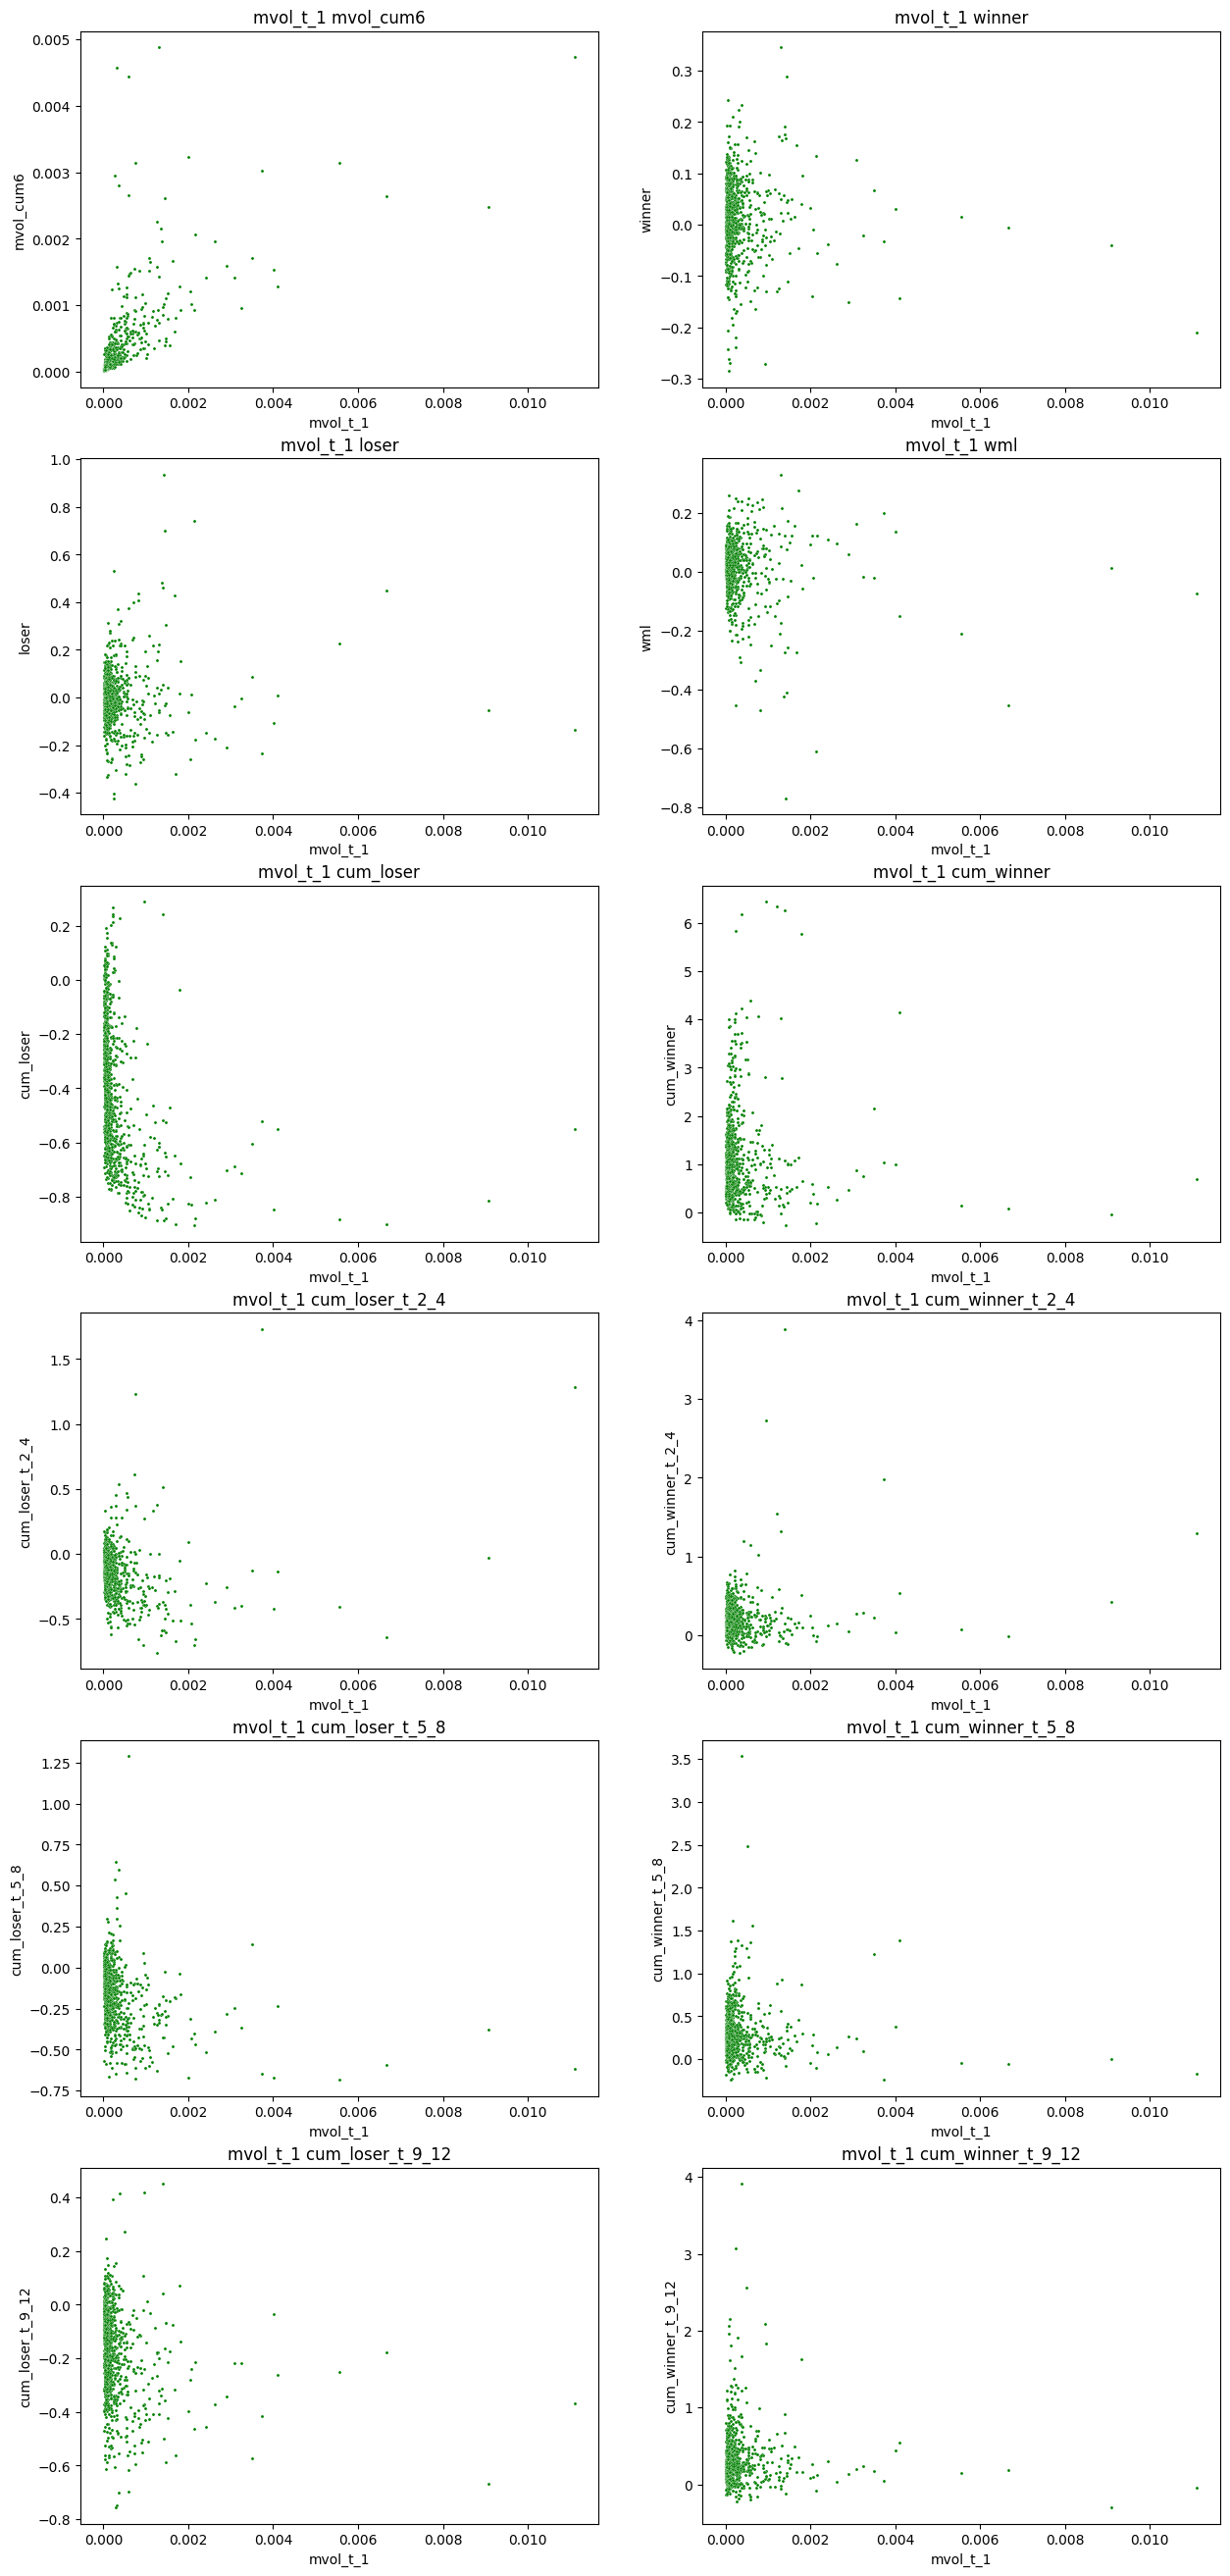

In [ ]:
who_Volatility(dynmom, 'mvol_t_1')

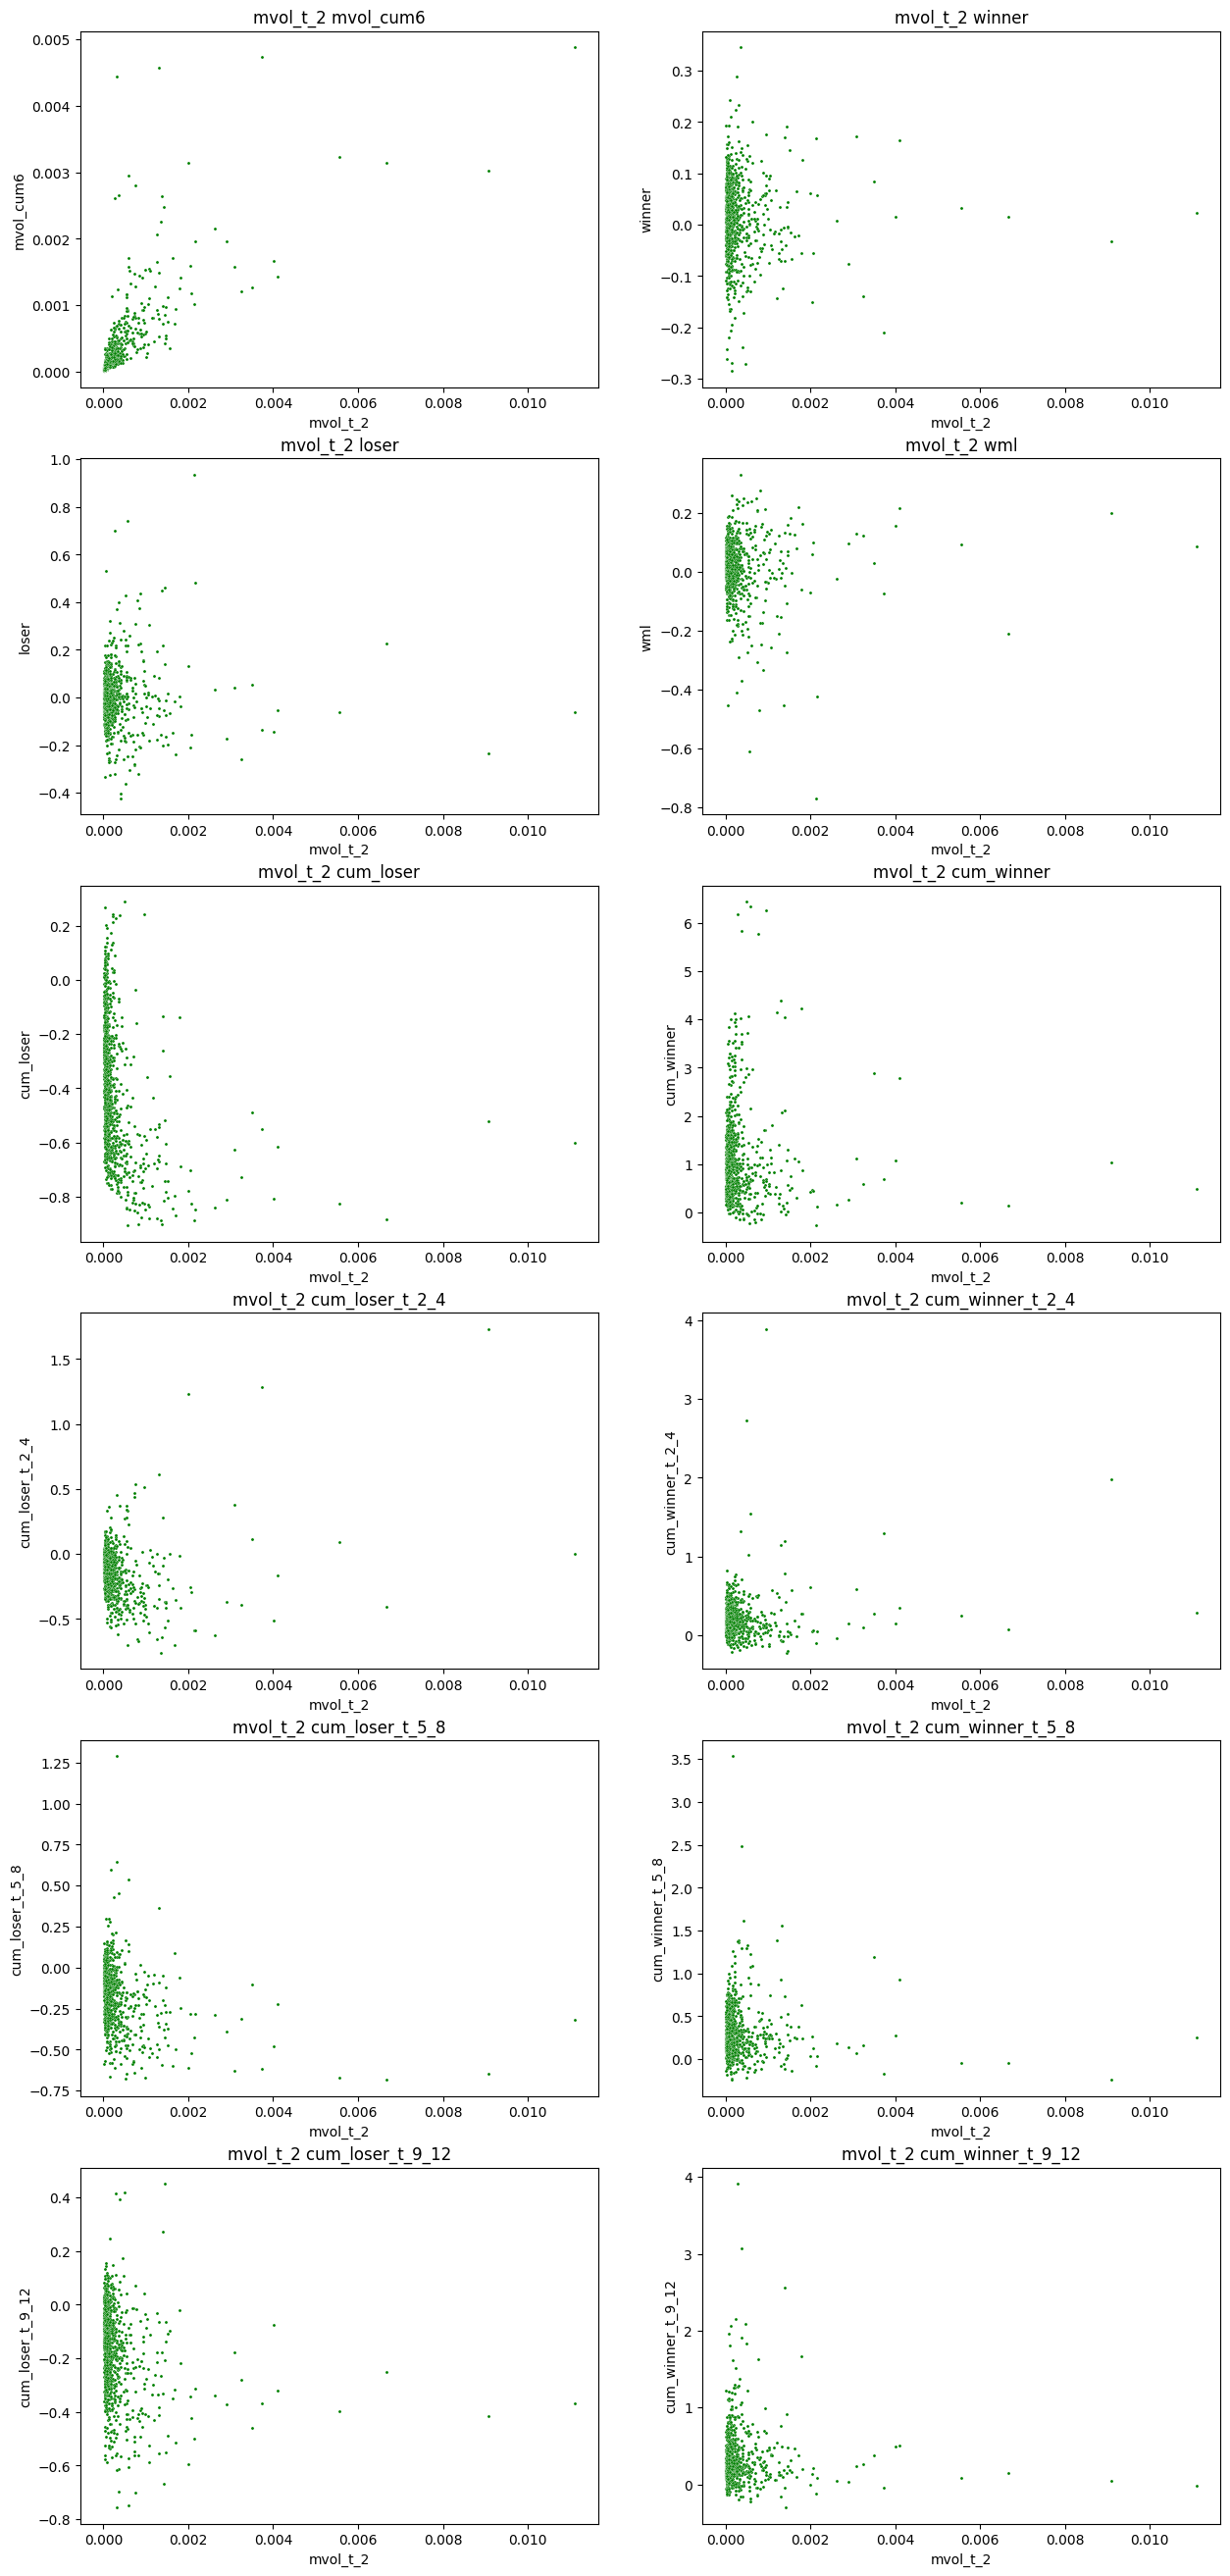

In [ ]:
who_Volatility(dynmom, 'mvol_t_2')

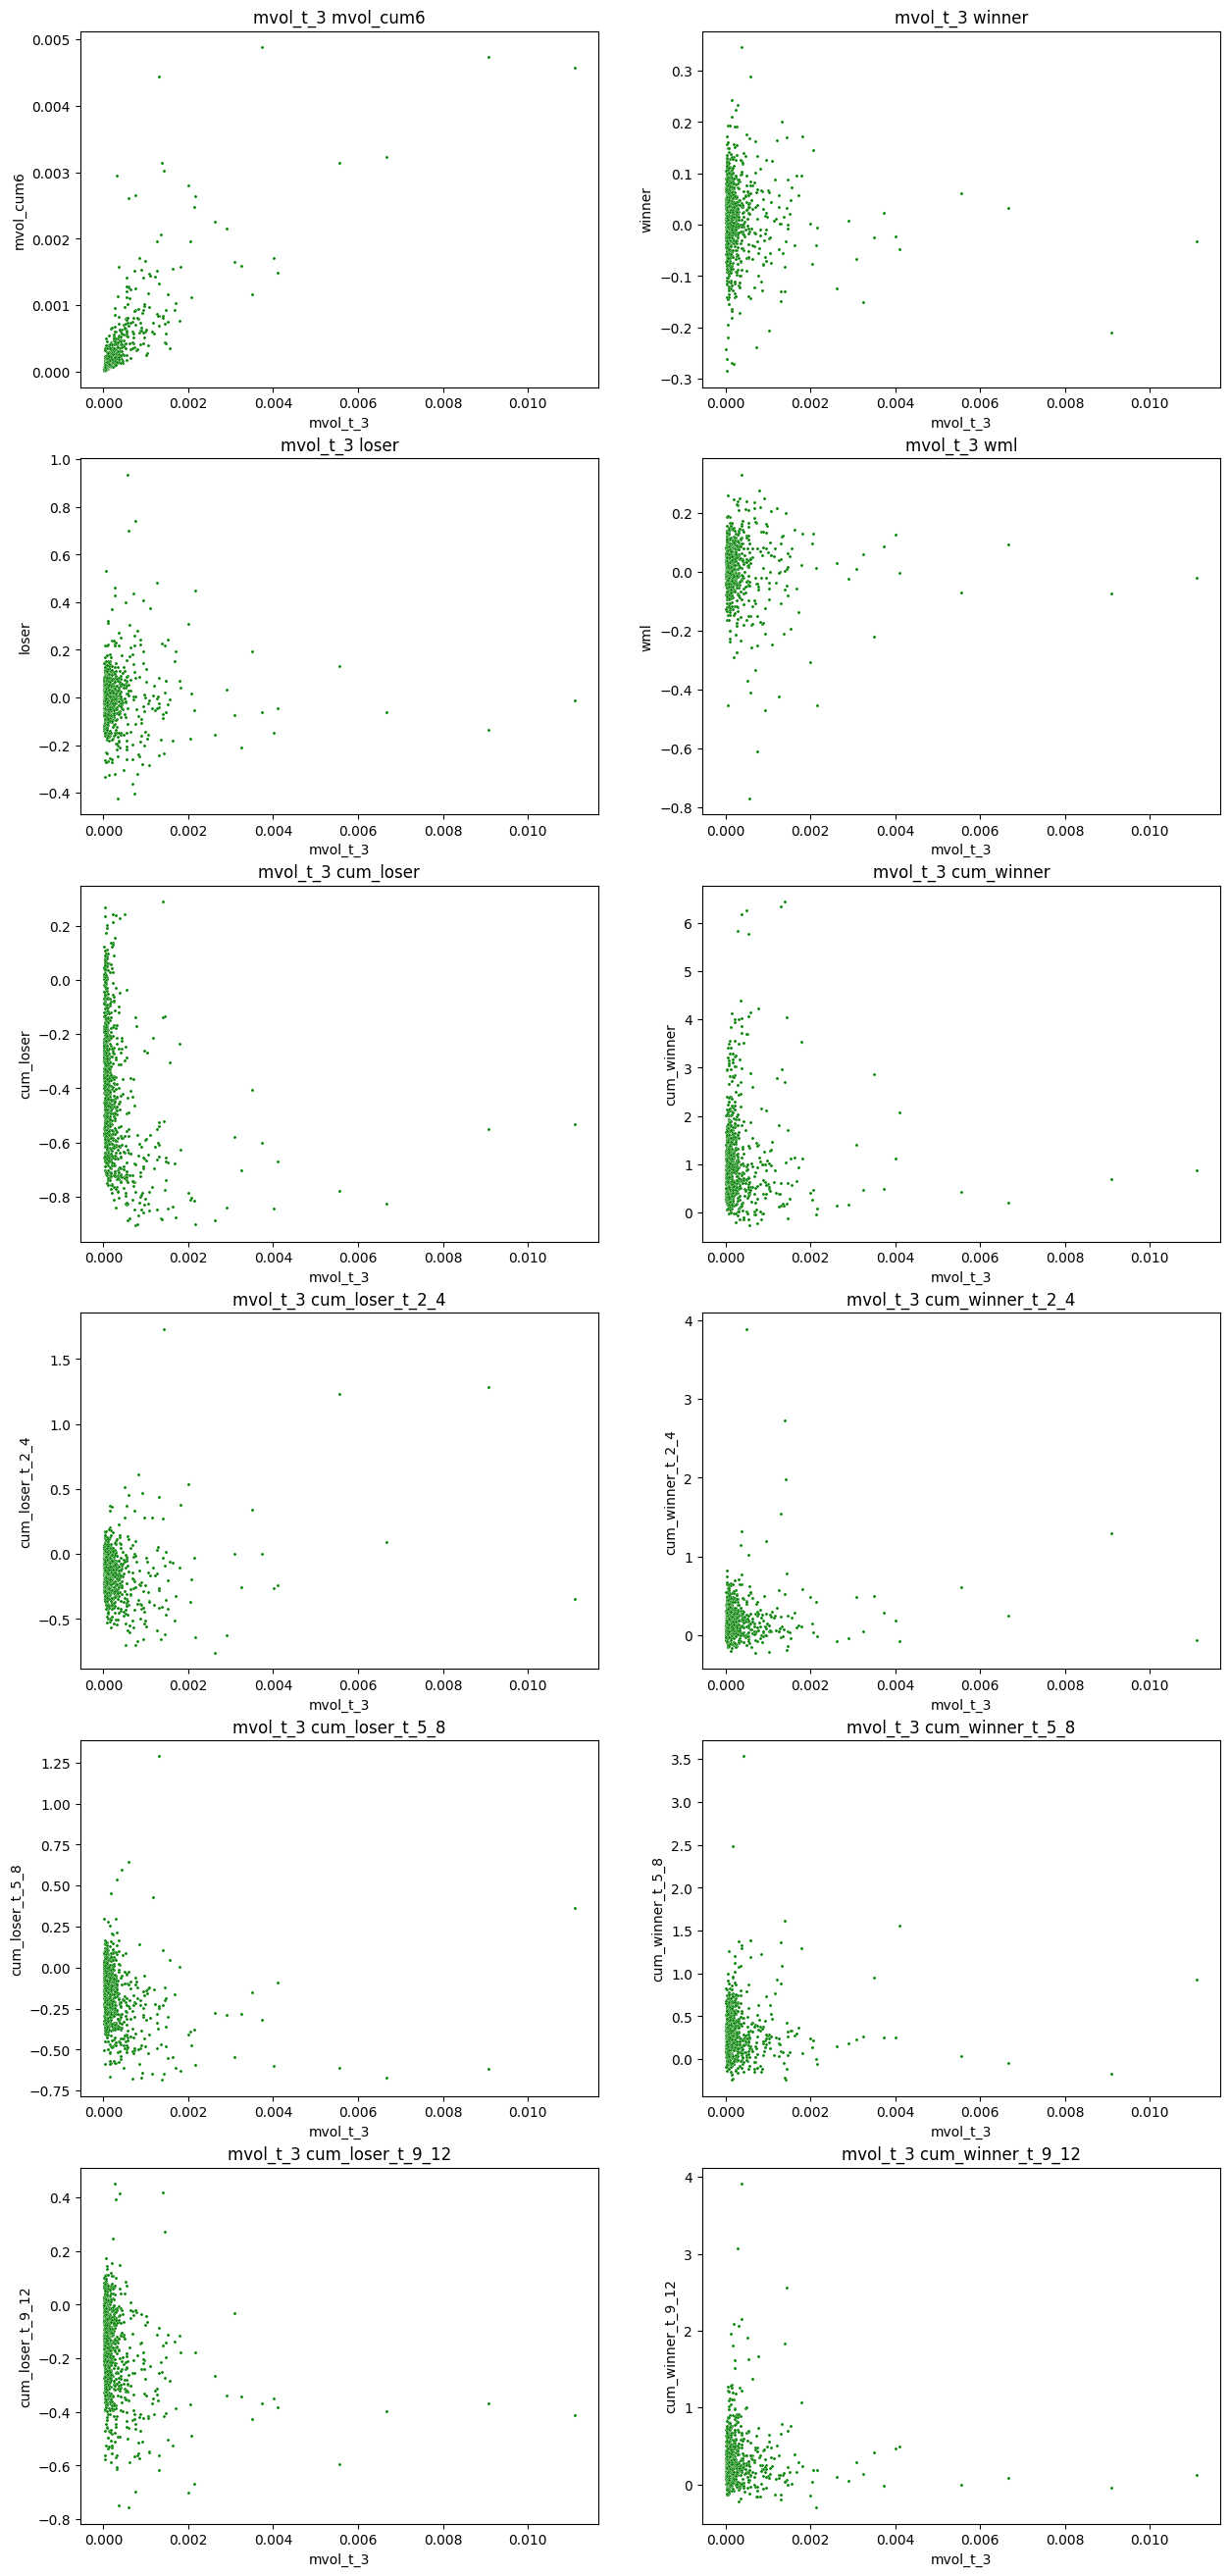

In [ ]:
who_Volatility(dynmom, 'mvol_t_3')

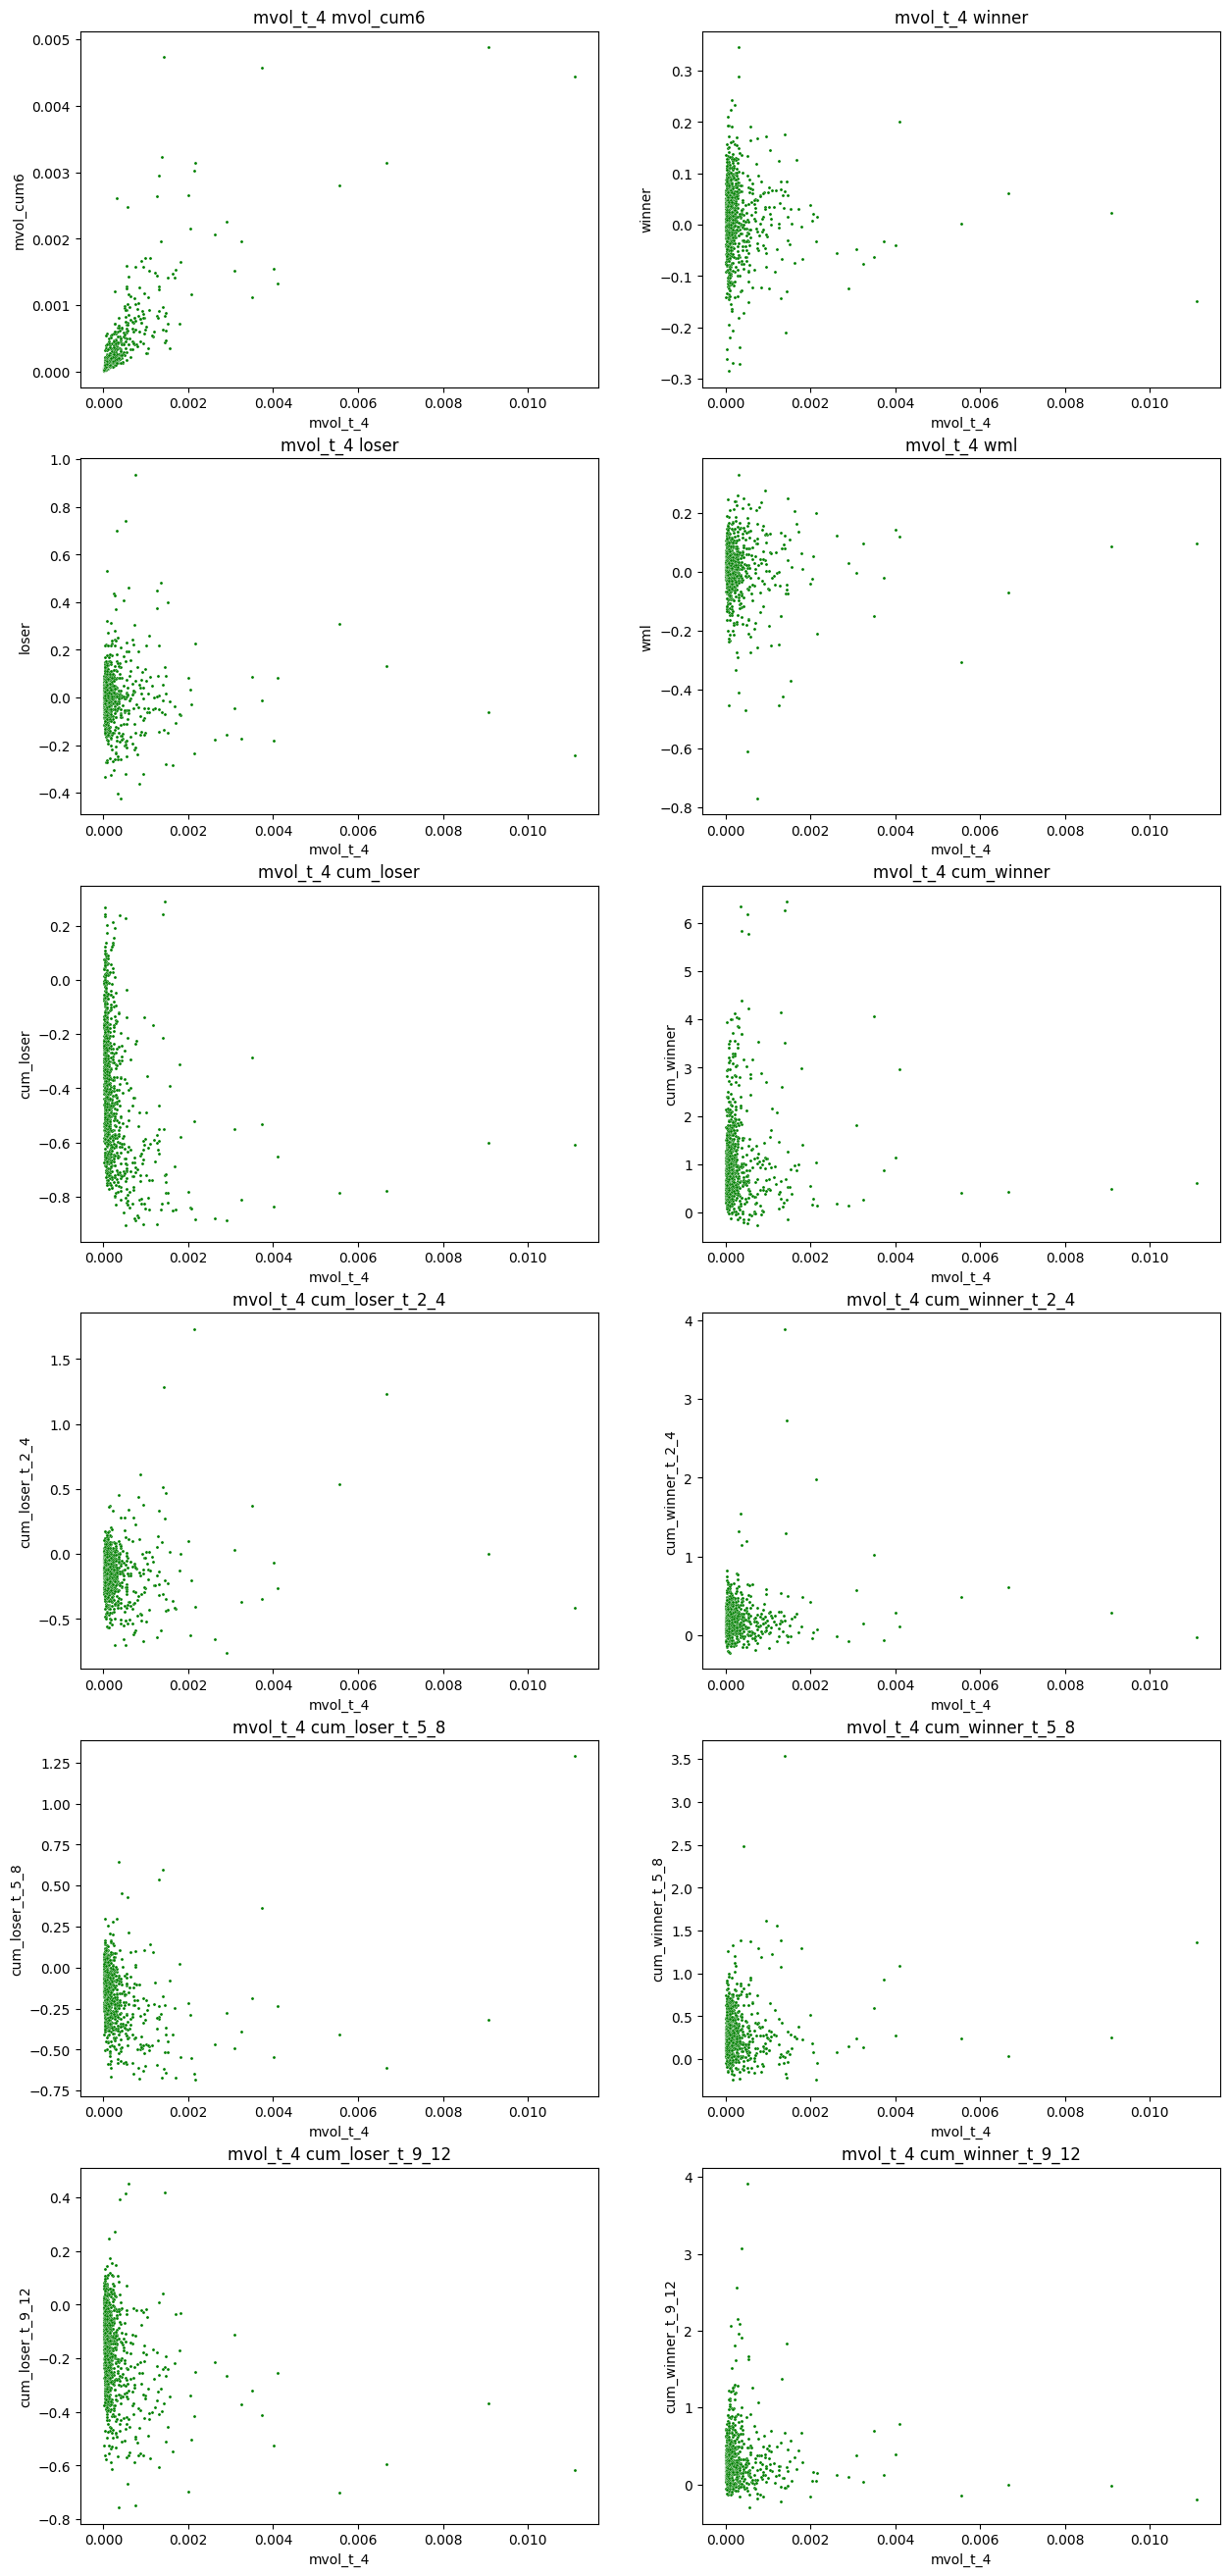

In [ ]:
who_Volatility(dynmom, 'mvol_t_4')

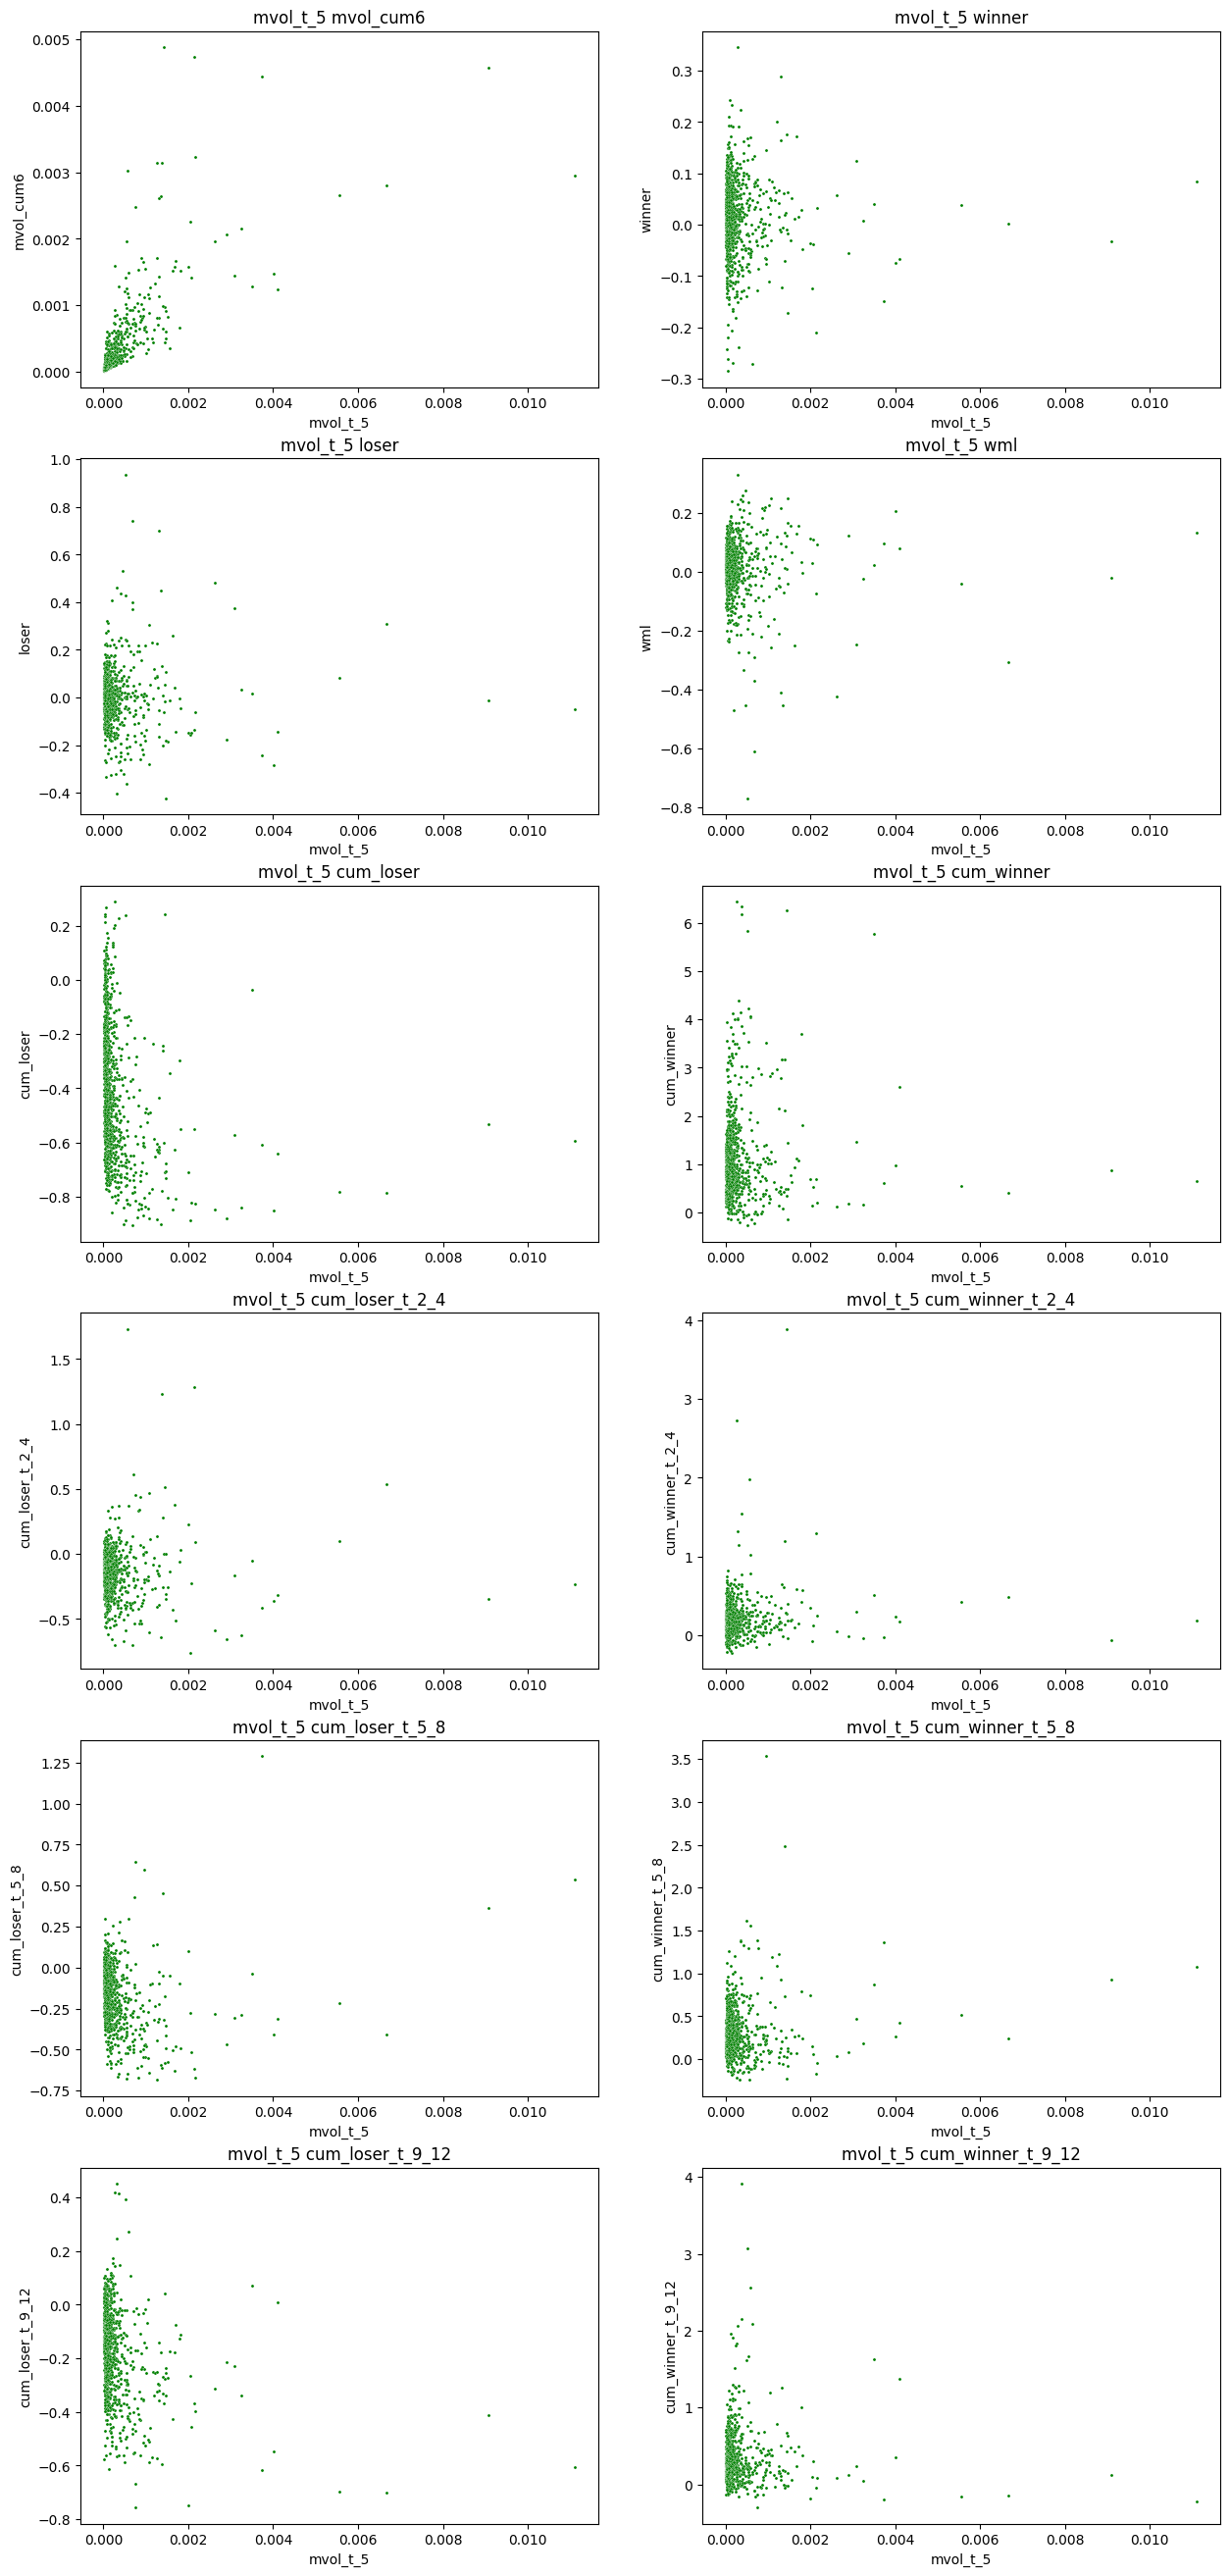

In [ ]:
who_Volatility(dynmom, 'mvol_t_5')

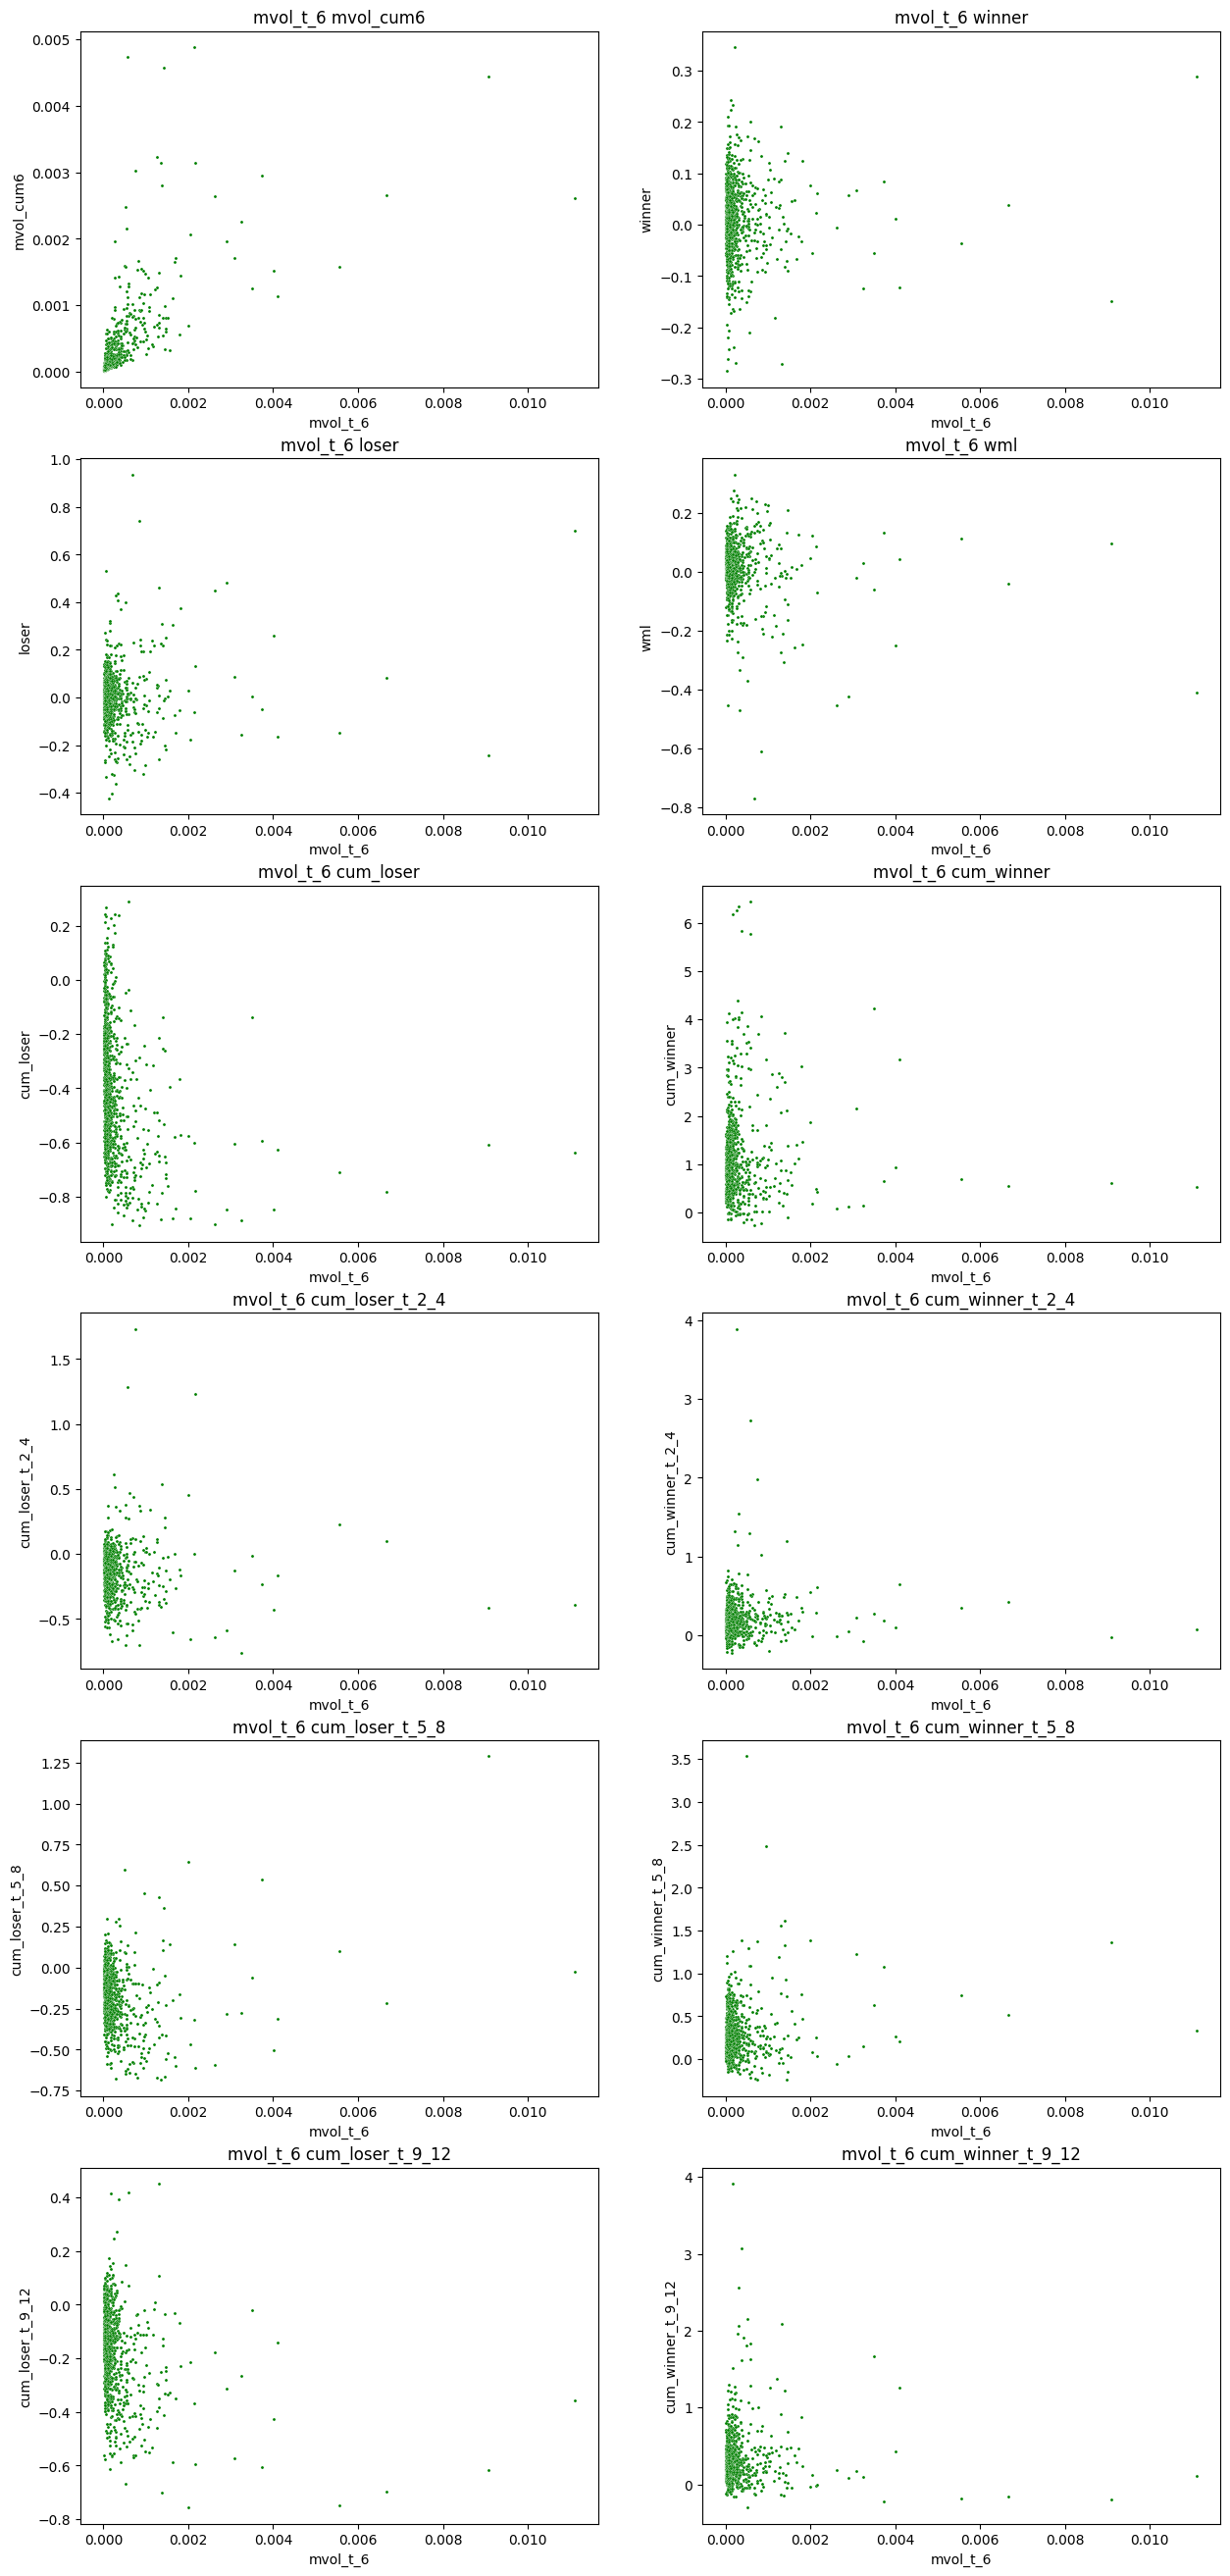

In [ ]:
who_Volatility(dynmom, 'mvol_t_6')